In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
import feature_engine
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
import missingno as miss
from tensorflow import keras

In [2]:
weather=pd.read_csv("D:\wallpapers and photos\csv\weatherAUS.csv")

In [3]:
weather


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
list(weather[:0])

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

<Axes: >

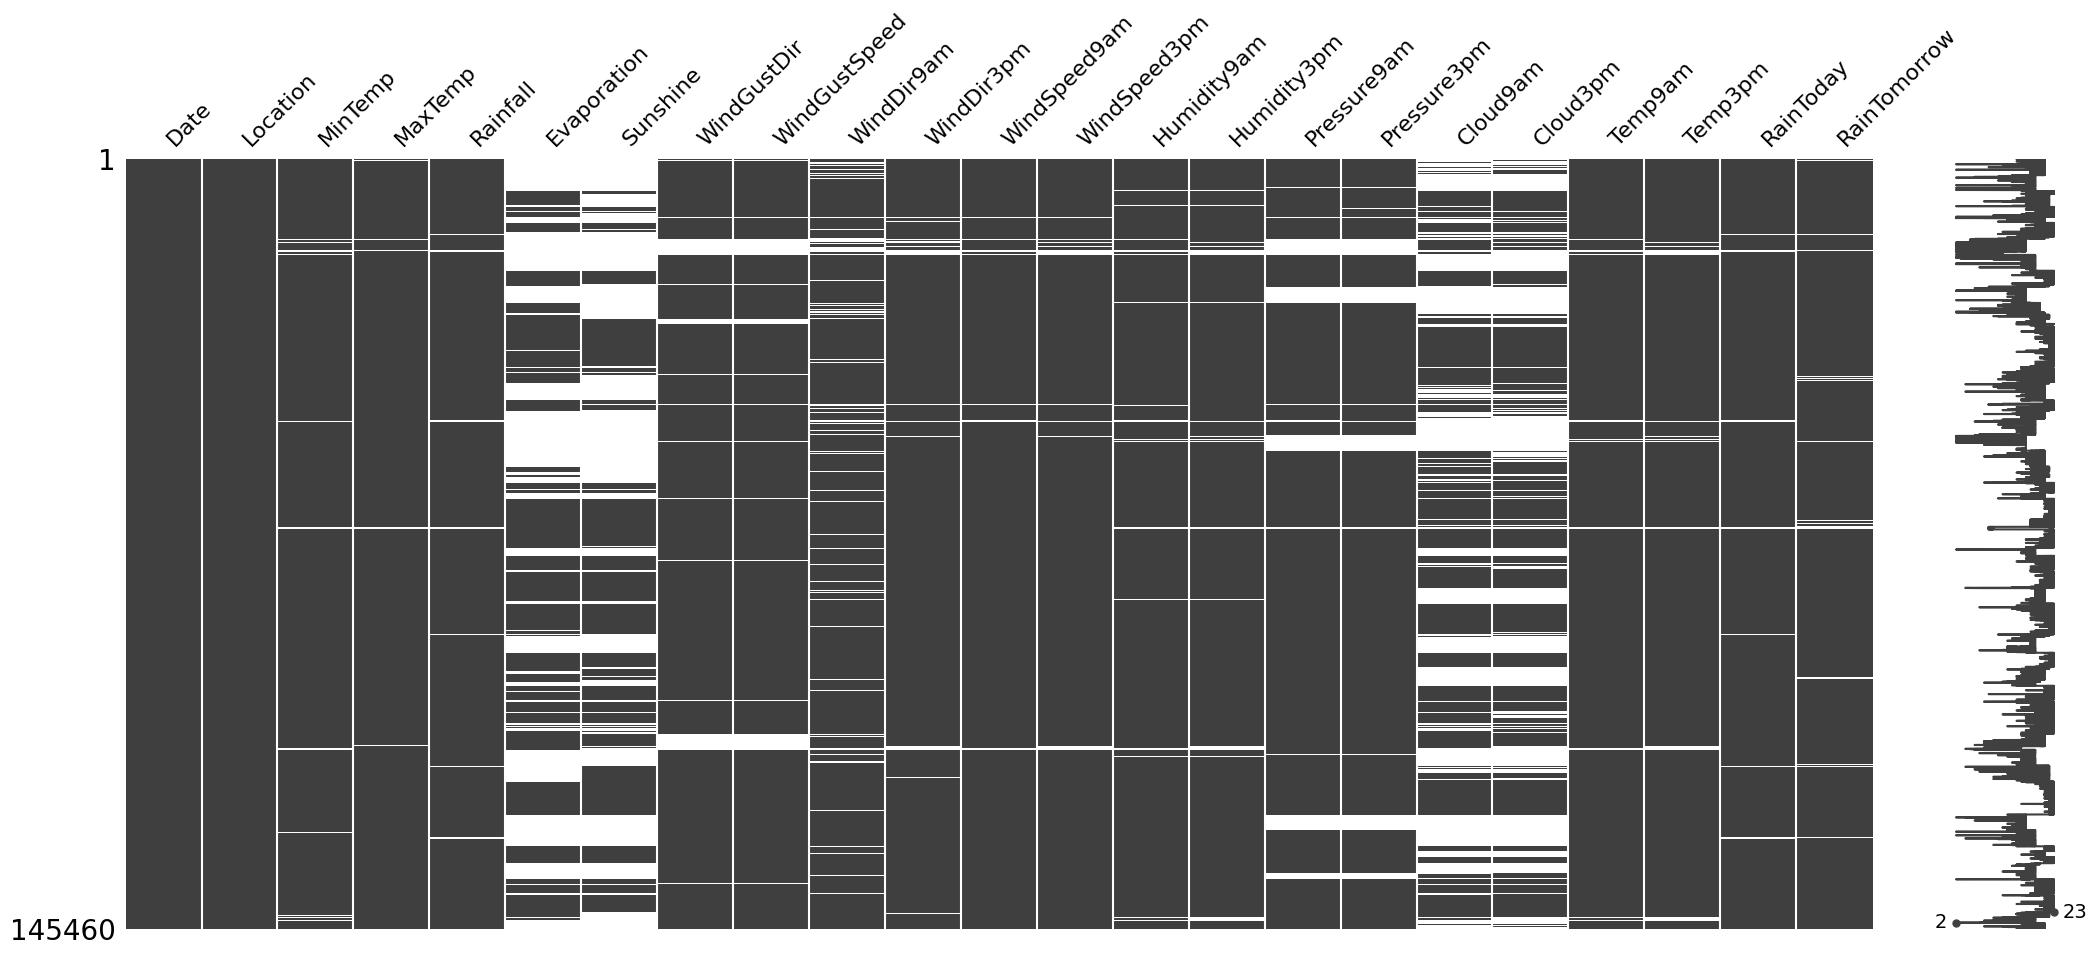

In [5]:
miss.matrix(weather)

<Axes: xlabel='count', ylabel='Location'>

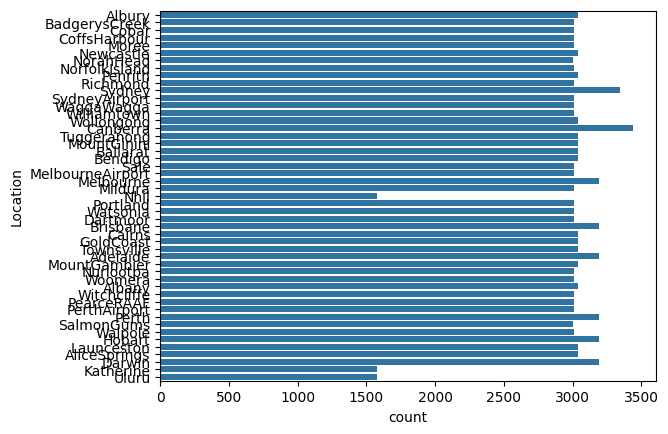

In [6]:
sns.countplot(weather["Location"])

## Value dropping

###### drop the values that has major chunk of missing values as imputing them will create massive bias in our model and them we will drop the missing rows in our RainToday and RainTomorrow  column

In [7]:
weather_drop=weather.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)
weather_drop=weather_drop.dropna(subset=['RainToday','RainTomorrow'])

In [8]:
weather_drop

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6/20/2017,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,6/21/2017,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


<Axes: >

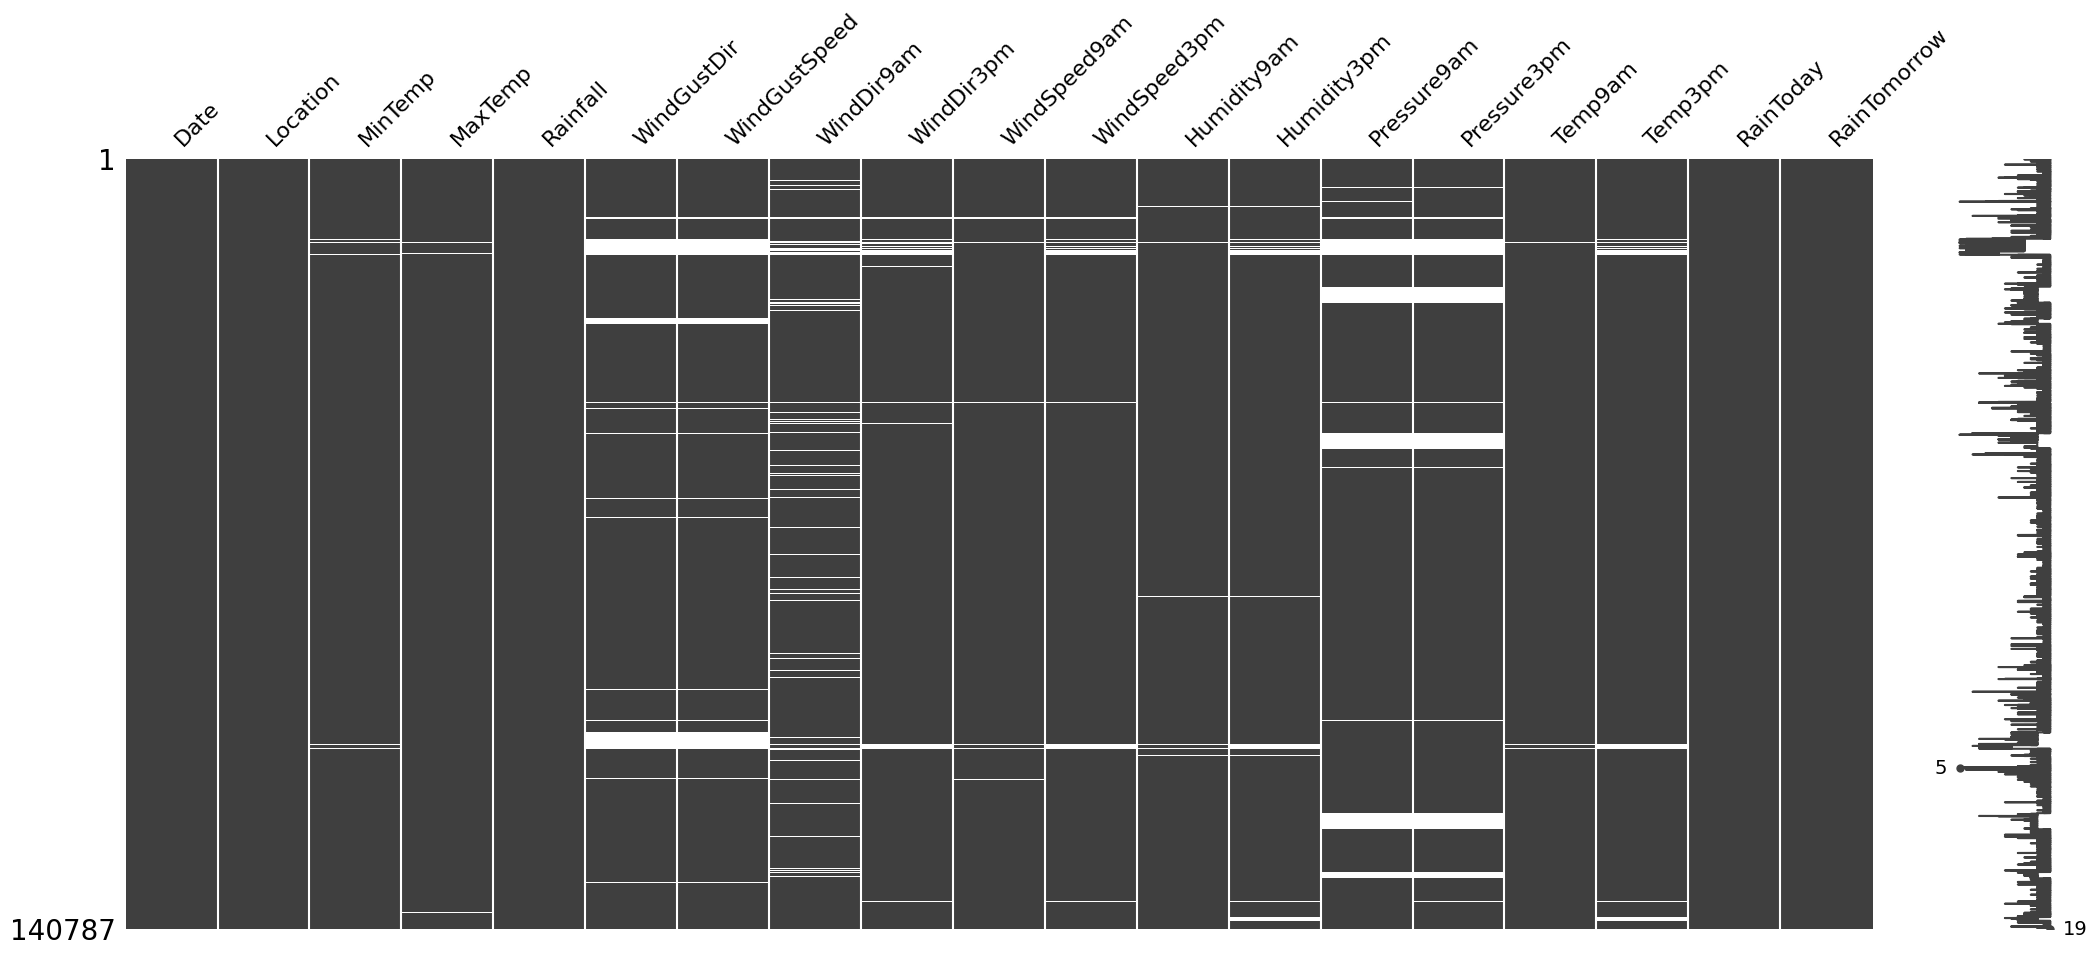

In [9]:
miss.matrix(weather_drop)

In [10]:
weather_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    131624 non-null  object 
 6   WindGustSpeed  131682 non-null  float64
 7   WindDir9am     131127 non-null  object 
 8   WindDir3pm     137117 non-null  object 
 9   WindSpeed9am   139732 non-null  float64
 10  WindSpeed3pm   138256 non-null  float64
 11  Humidity9am    139270 non-null  float64
 12  Humidity3pm    137286 non-null  float64
 13  Pressure9am    127044 non-null  float64
 14  Pressure3pm    127018 non-null  float64
 15  Temp9am        140131 non-null  float64
 16  Temp3pm        138163 non-null  float64
 17  RainToday      140787 non-null  ob

In [11]:
weather_drop["Date"]=pd.to_datetime(weather_drop["Date"])

In [12]:
weather_drop

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [13]:
#columns with float data
col_float=weather_drop.select_dtypes(include=float).columns
list(col_float)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [14]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer

In [15]:
imputer=KNNImputer(n_neighbors=2)
knn_impute=SklearnTransformerWrapper(transformer=imputer,variables=list(col_float))
weather_impute_knn=knn_impute.fit_transform(weather_drop)
iterative_impute=SklearnTransformerWrapper(transformer=IterativeImputer(random_state=0),variables=list(weather_drop.select_dtypes(float).columns))
weather_impute_iterative=iterative_impute.fit_transform(weather_drop)

C:\Users\Lenovo\anaconda3\envs\tensorflow\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [16]:
weather_impute_iterative

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [17]:
def compare(df1,df2):
        for i in list(col_float):
            sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
            fig,axis=plt.subplots(nrows=1,ncols=2)
            sns.histplot(df1[i],ax=axis[0])
            axis[0].set_title("before impute")
            sns.histplot(df2[i],color='red',ax=axis[1])
            axis[1].set_title("after impute")
            print(fig)

### Compare the distributions after imputation with knn

Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)


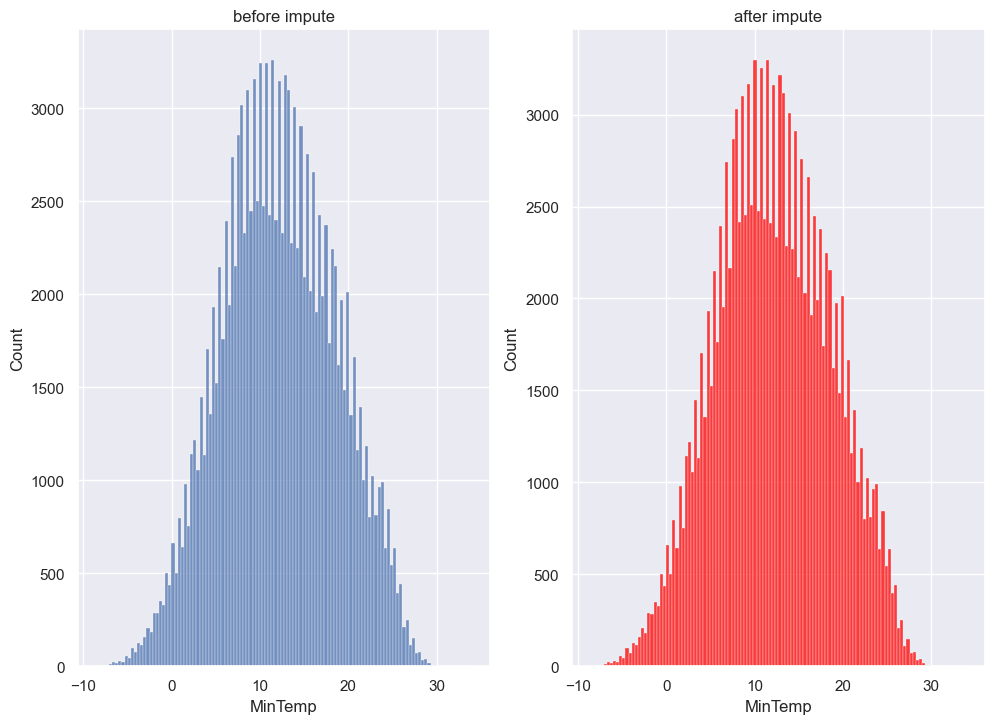

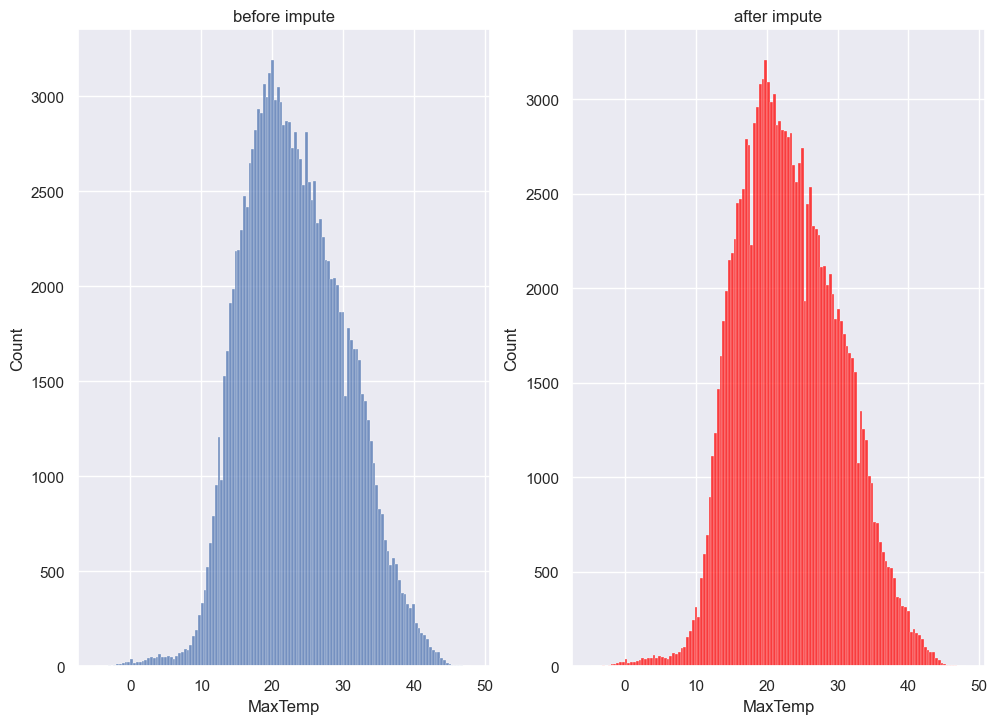

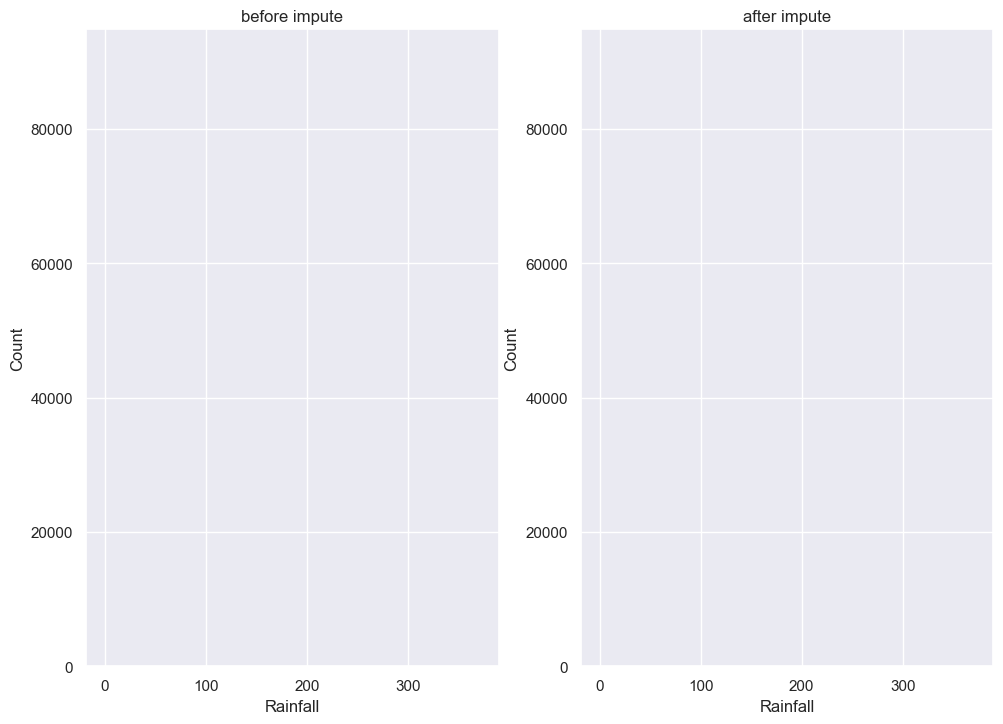

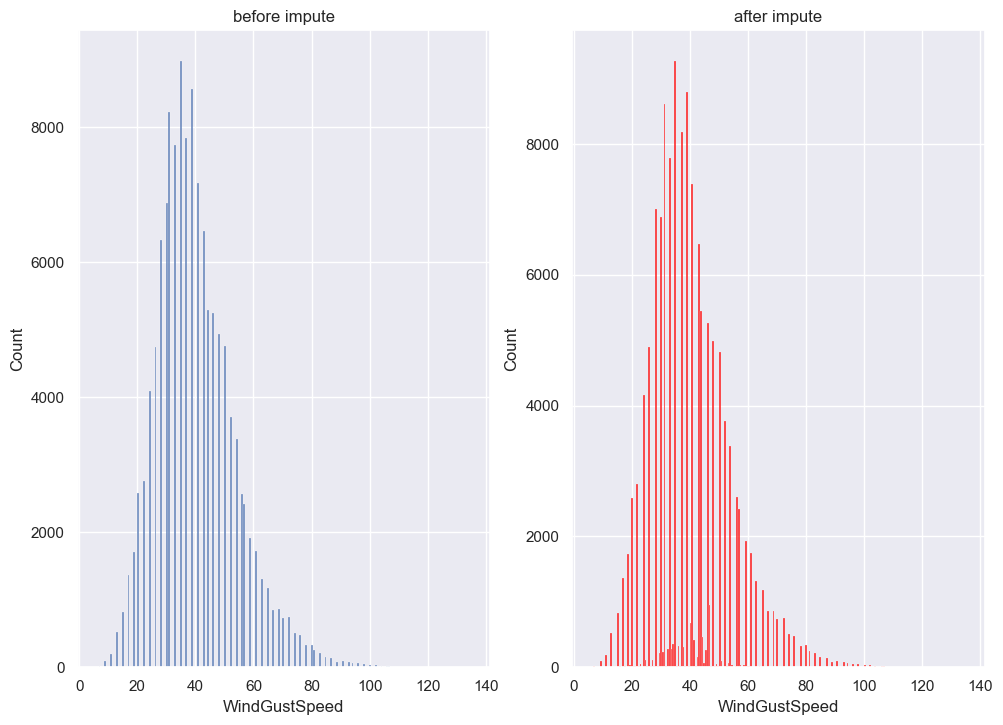

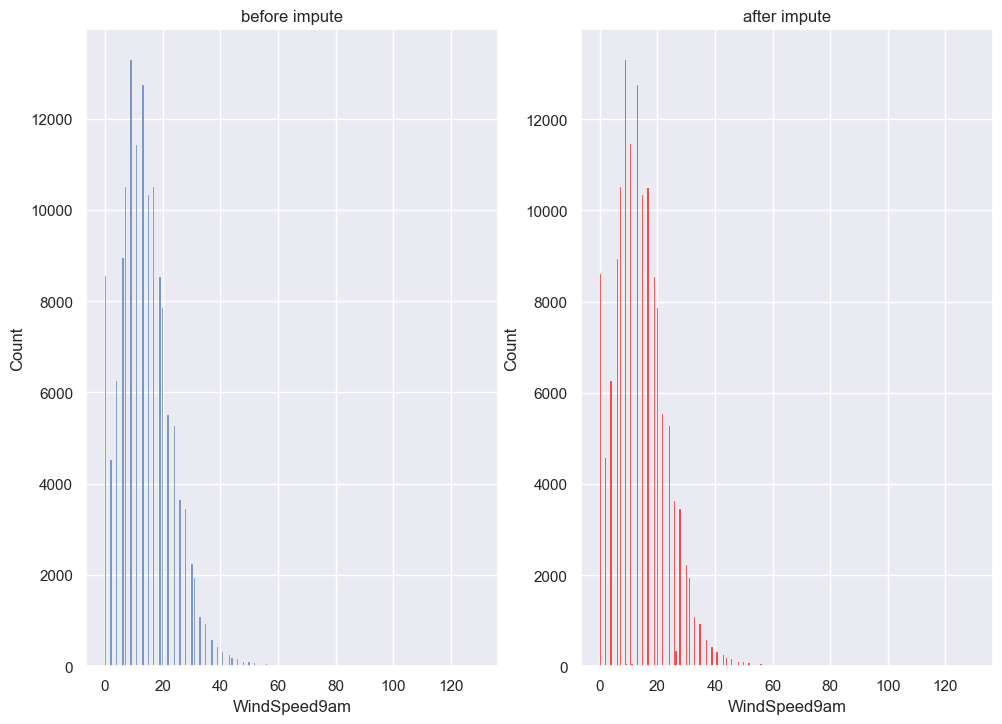

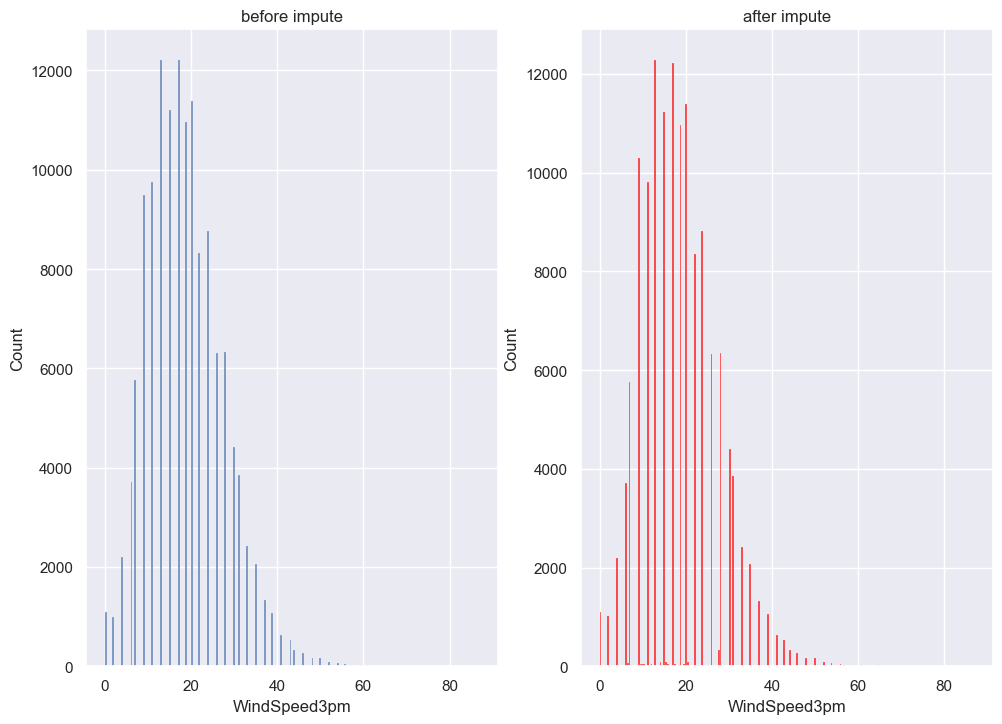

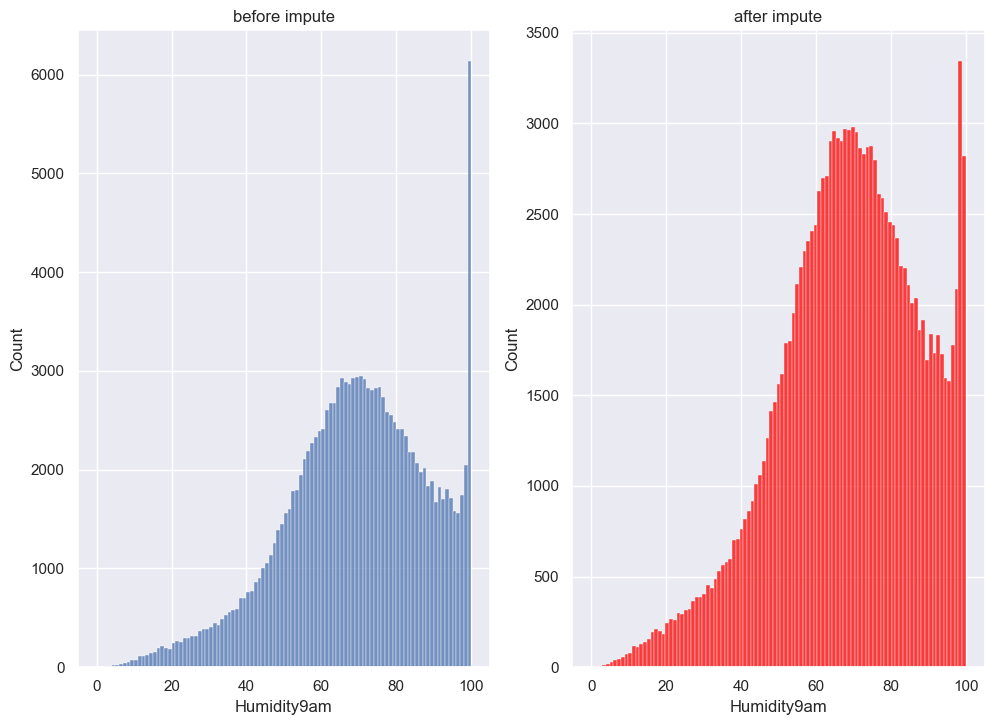

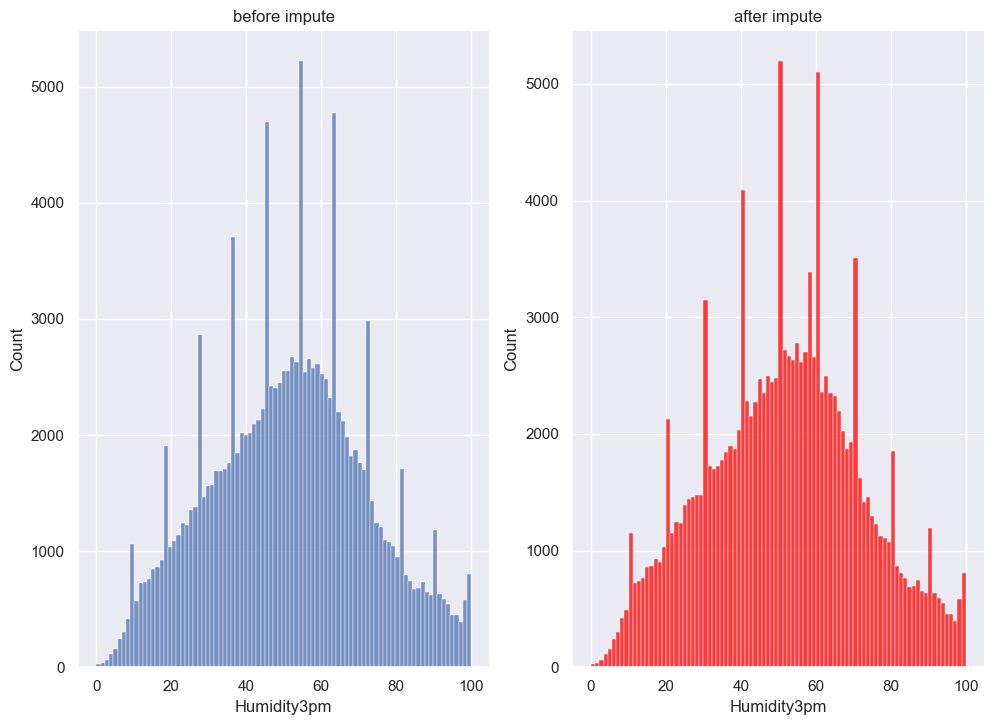

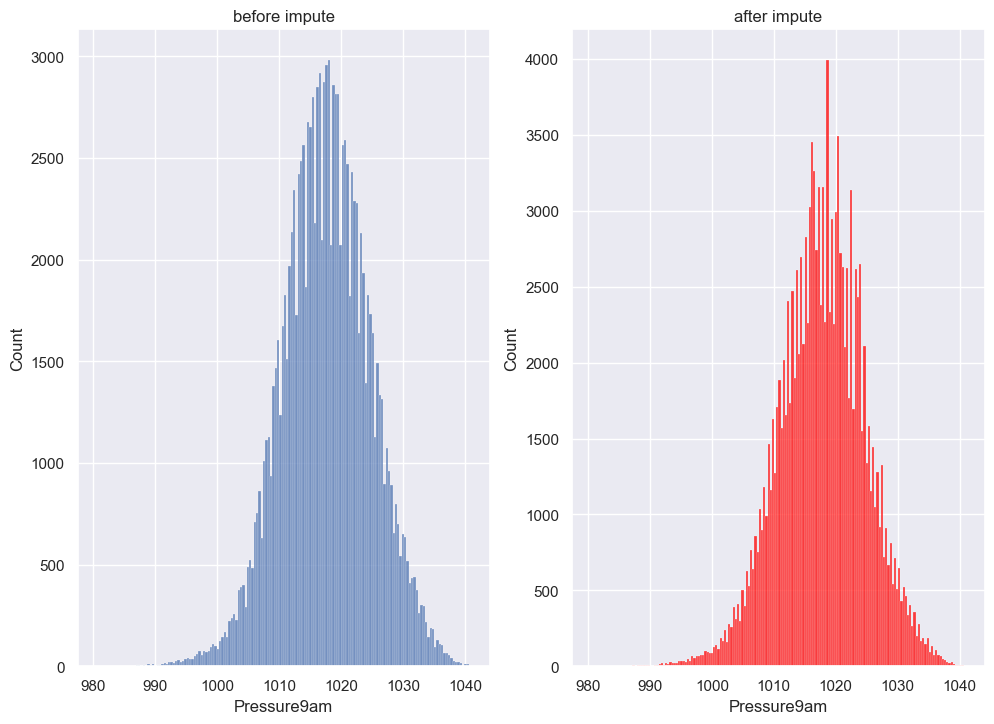

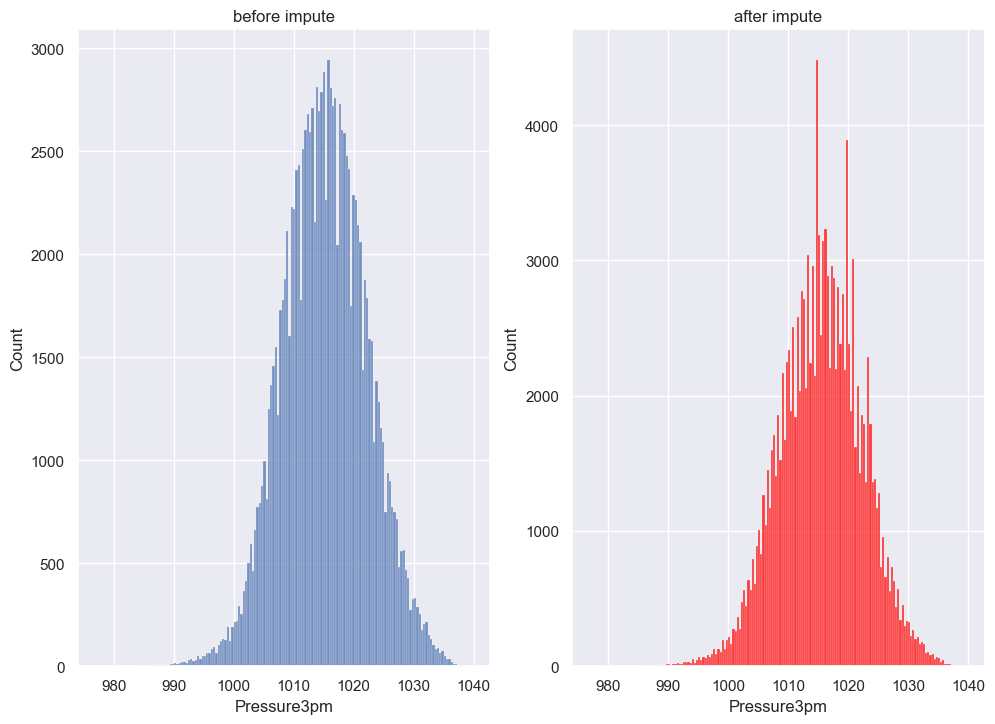

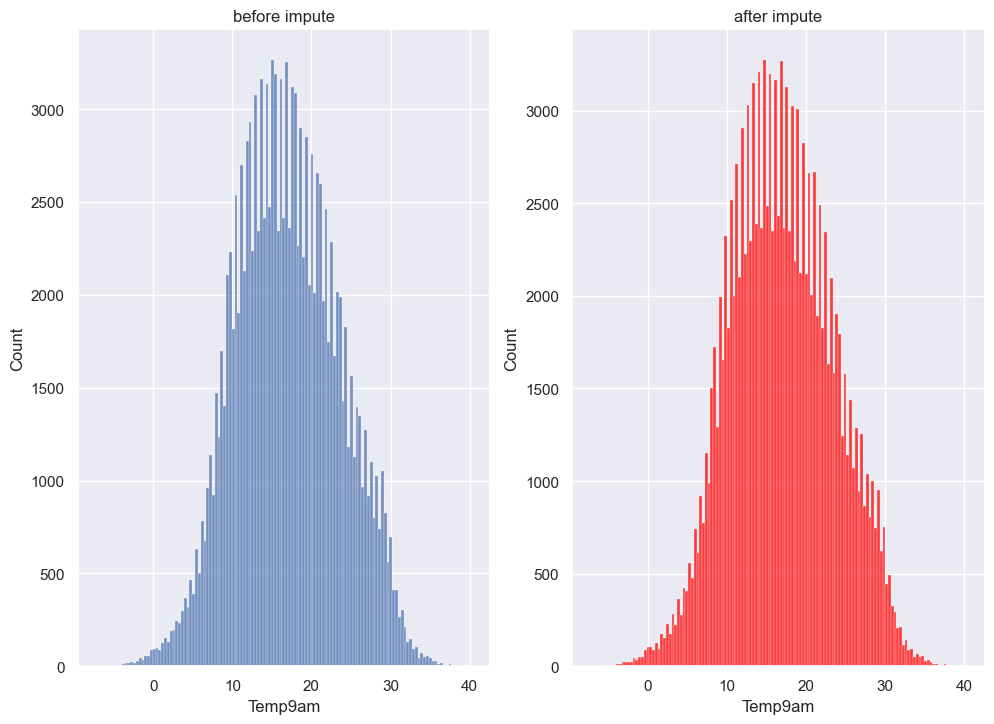

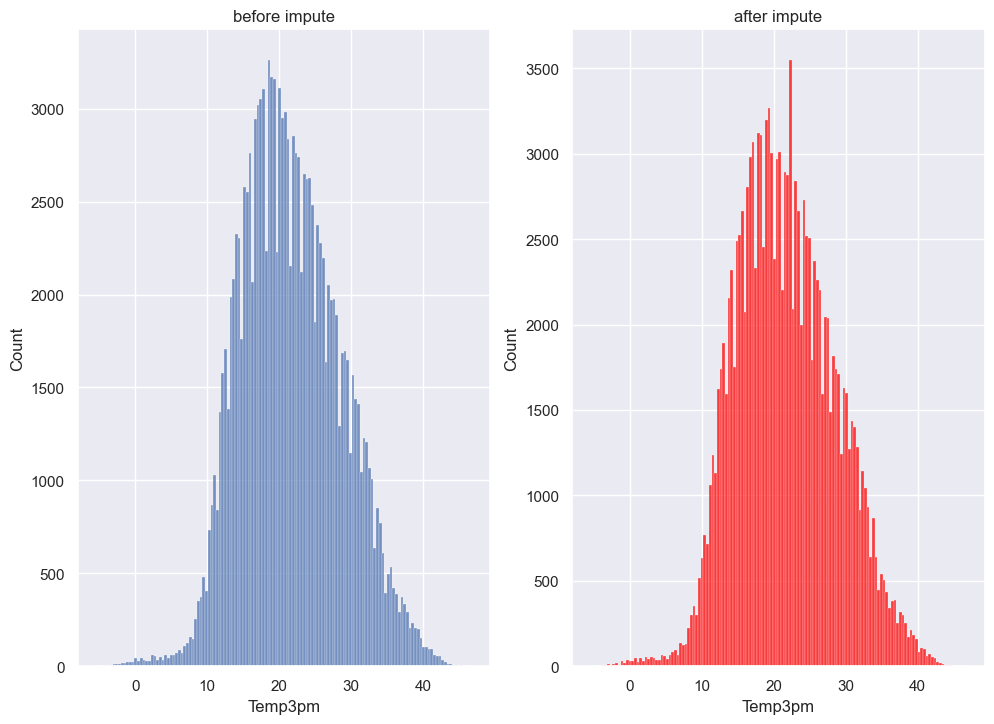

In [18]:
compare(weather_drop,weather_impute_knn)

### Compare the distributions after imputation with iterativeImputer

Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)


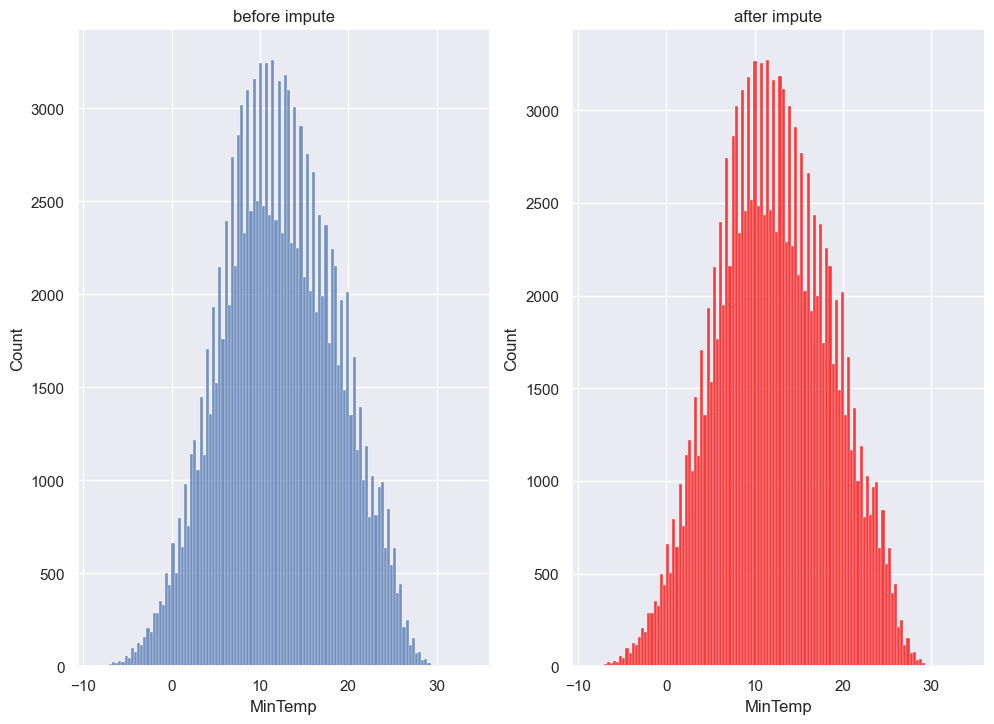

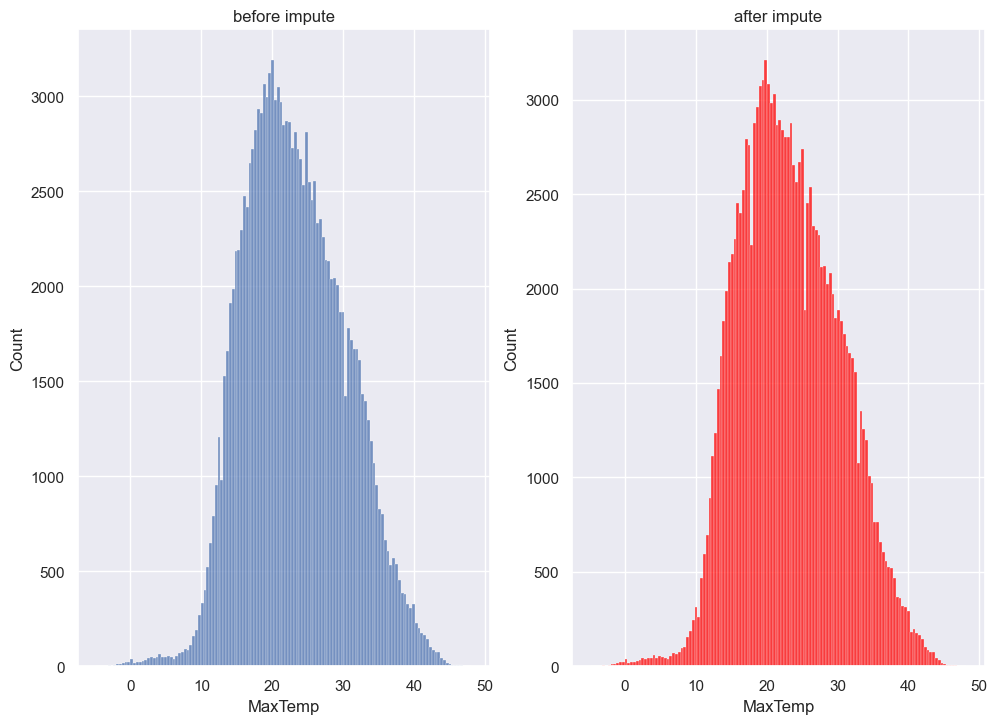

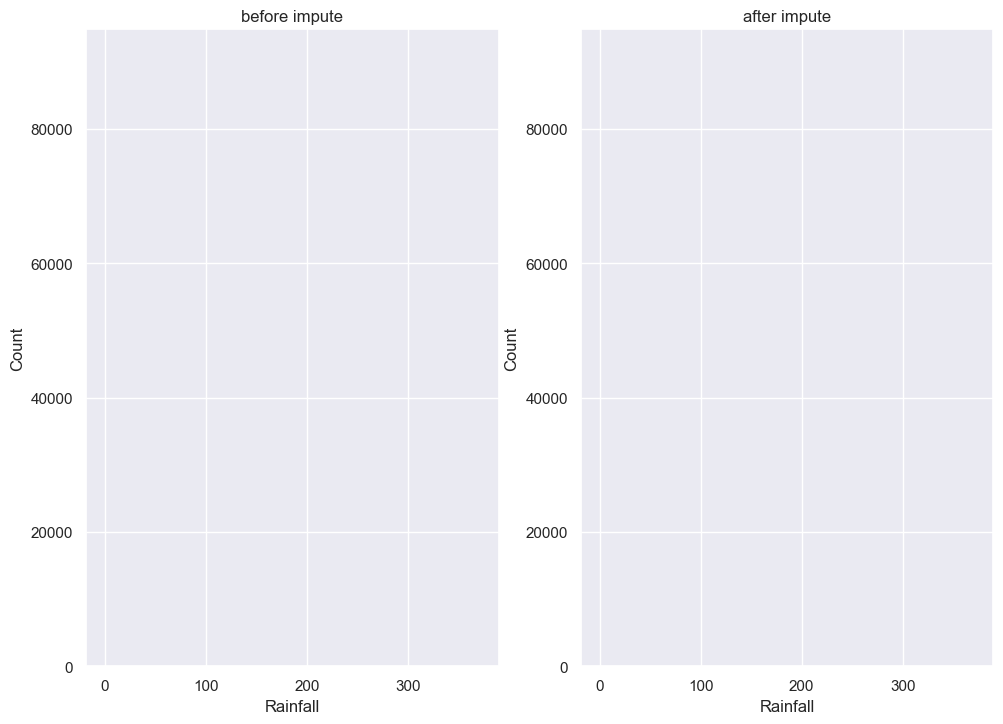

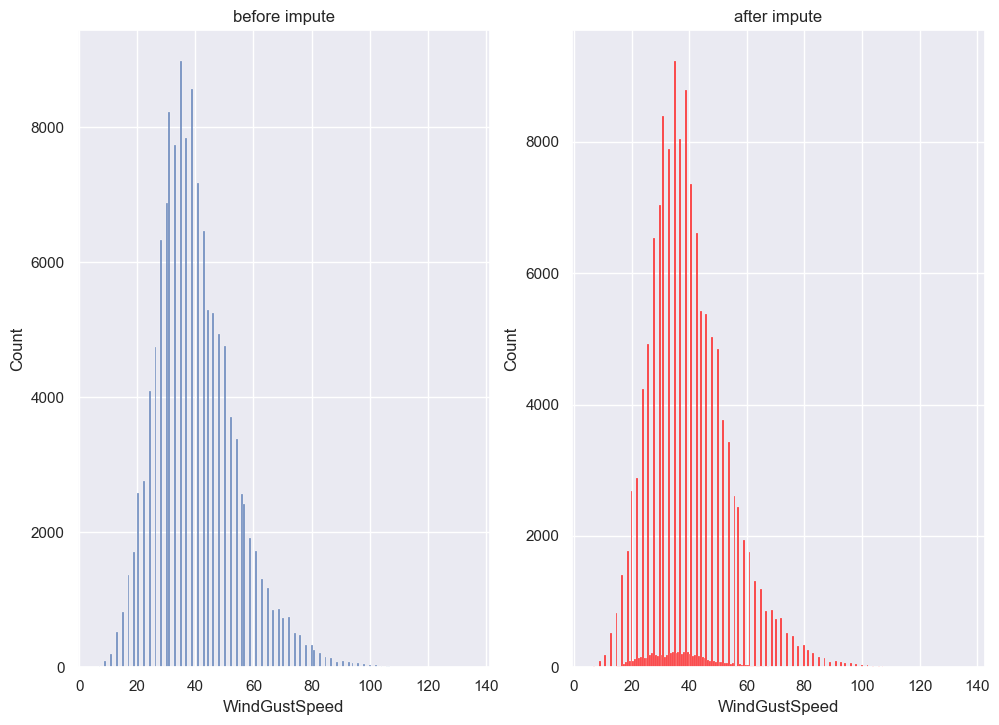

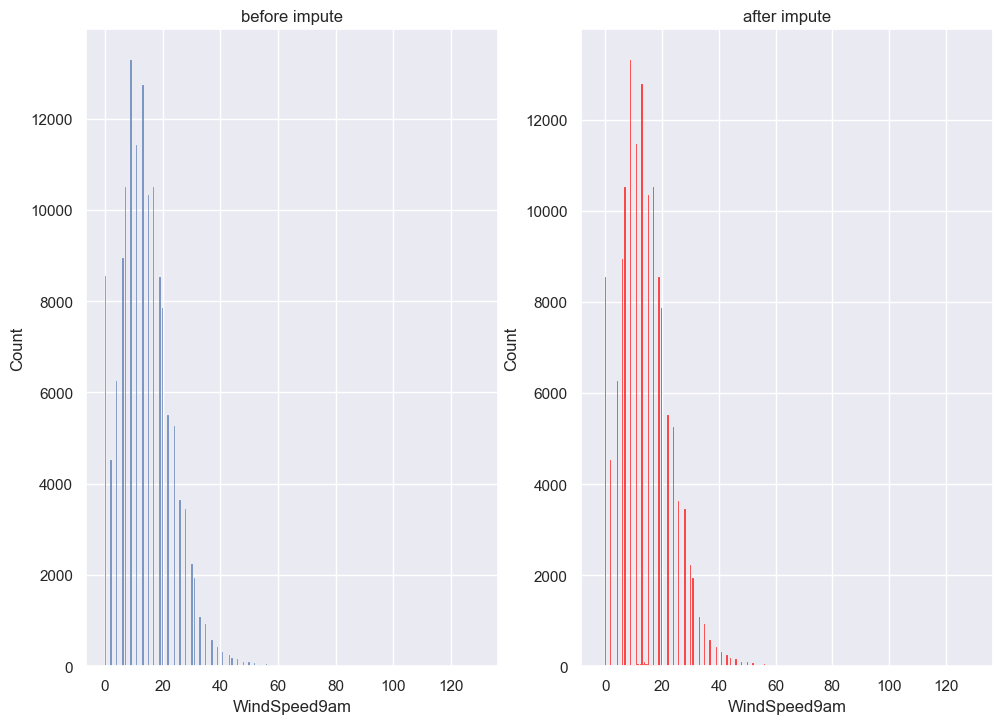

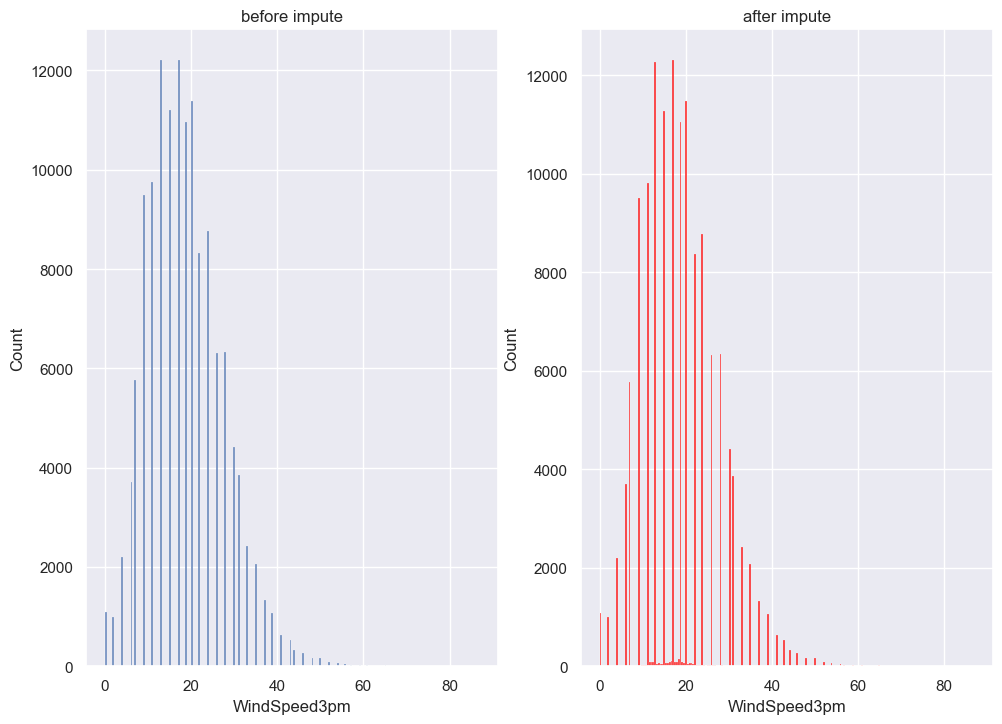

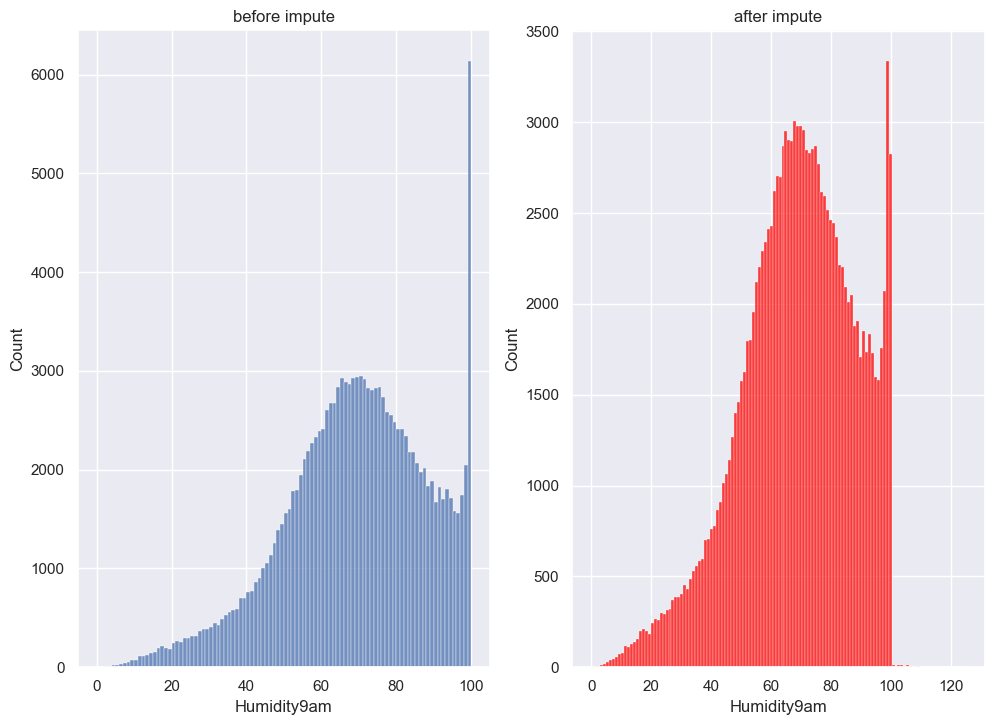

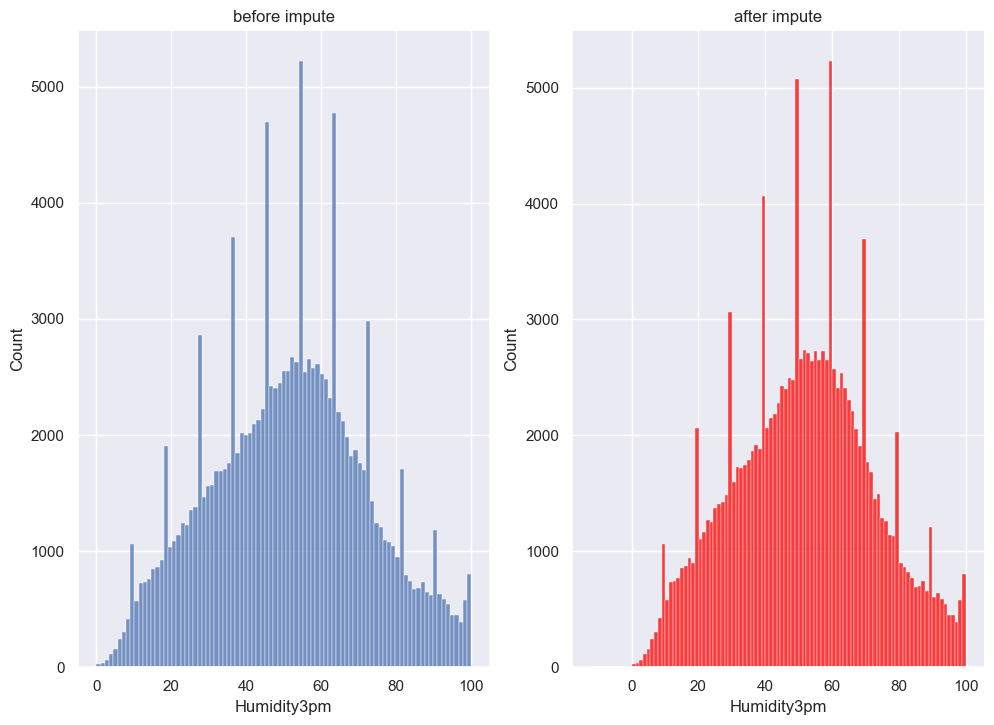

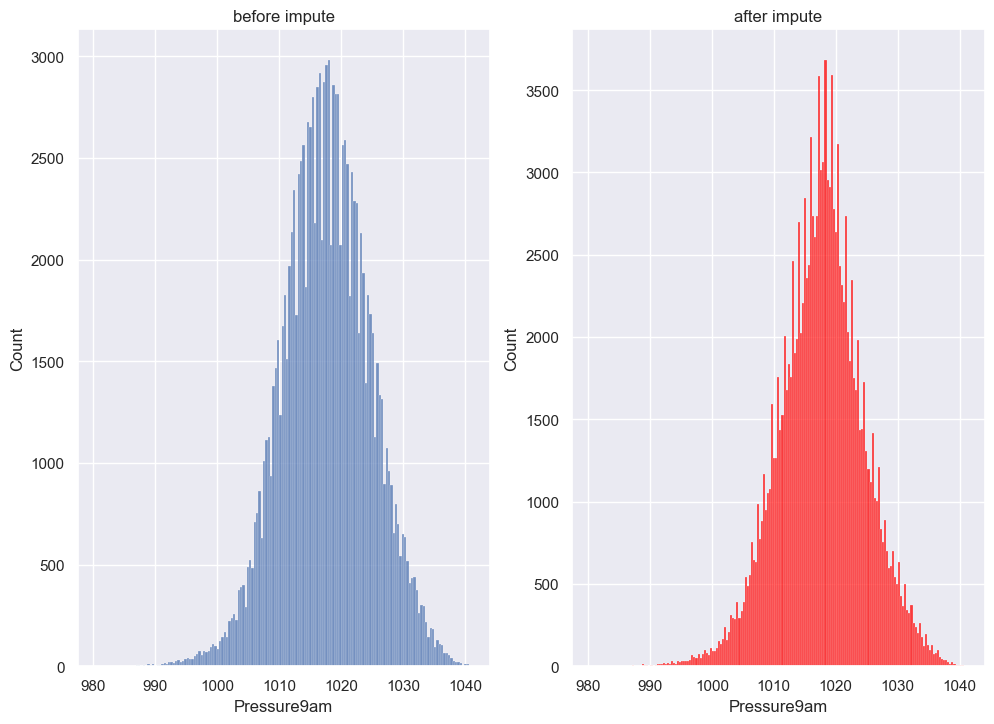

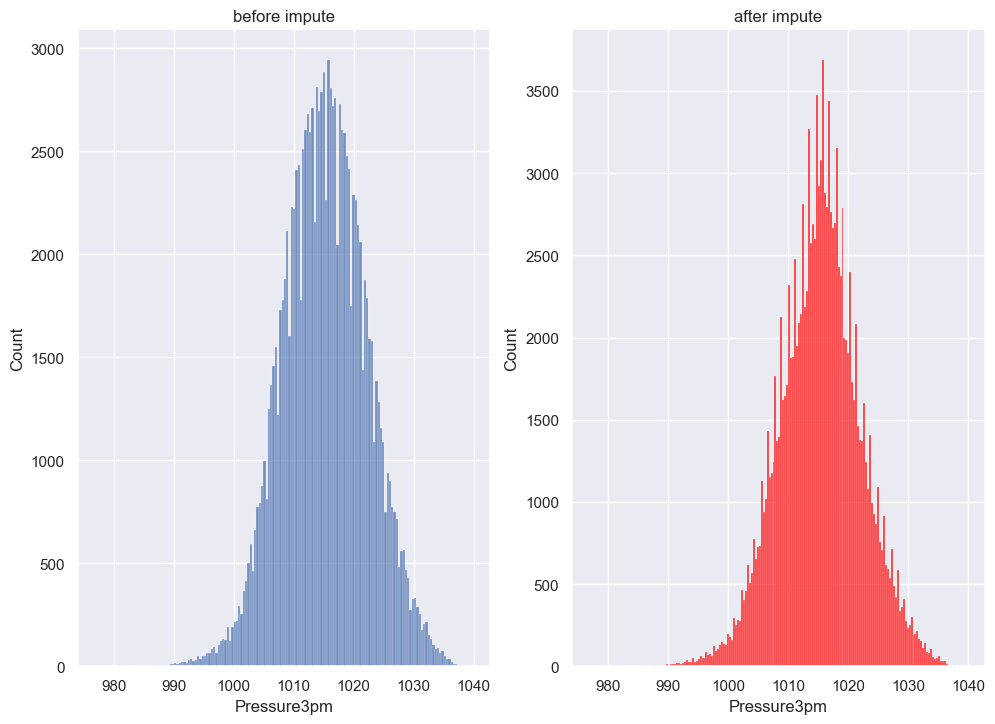

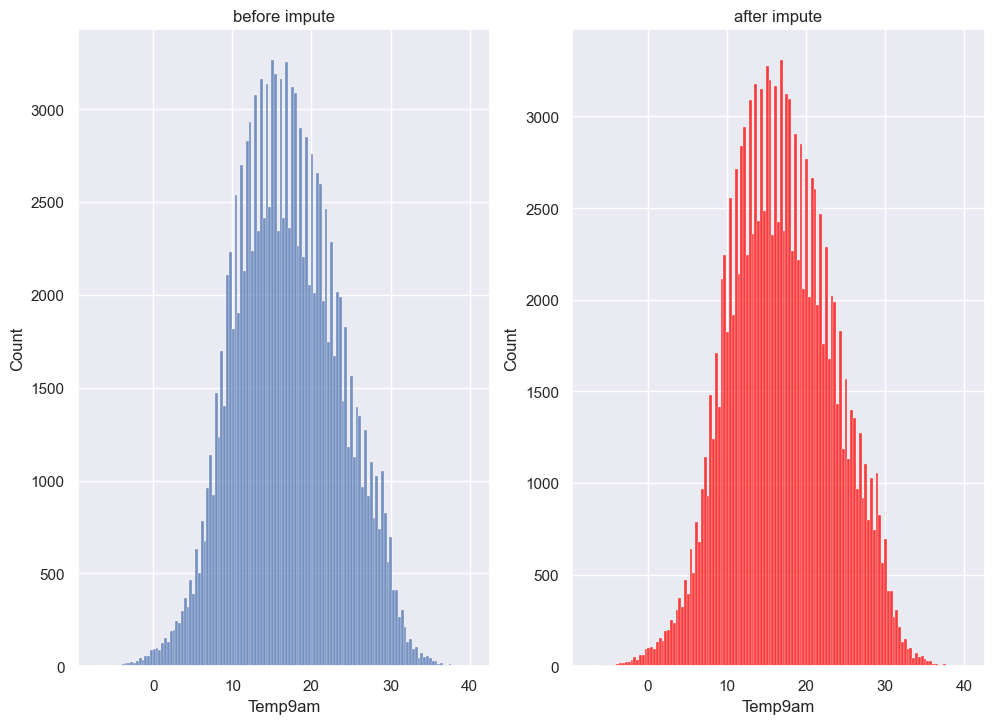

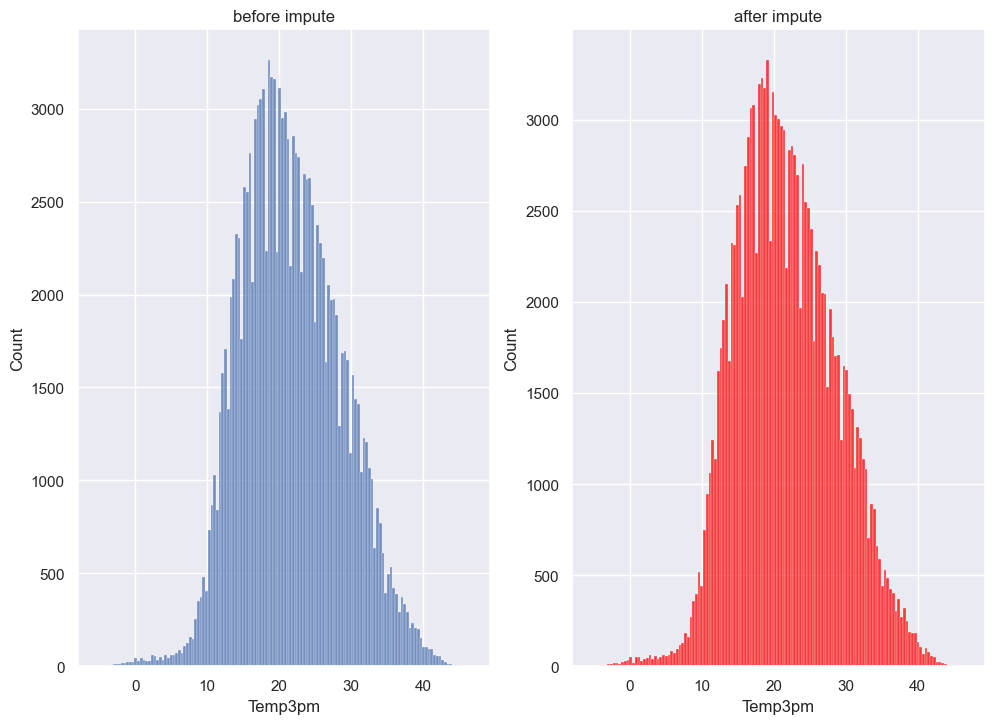

In [19]:
compare(weather_drop,weather_impute_iterative)

### Examine the *Rainfall* as its value in the distribution are very small

(0.0, 100.0)

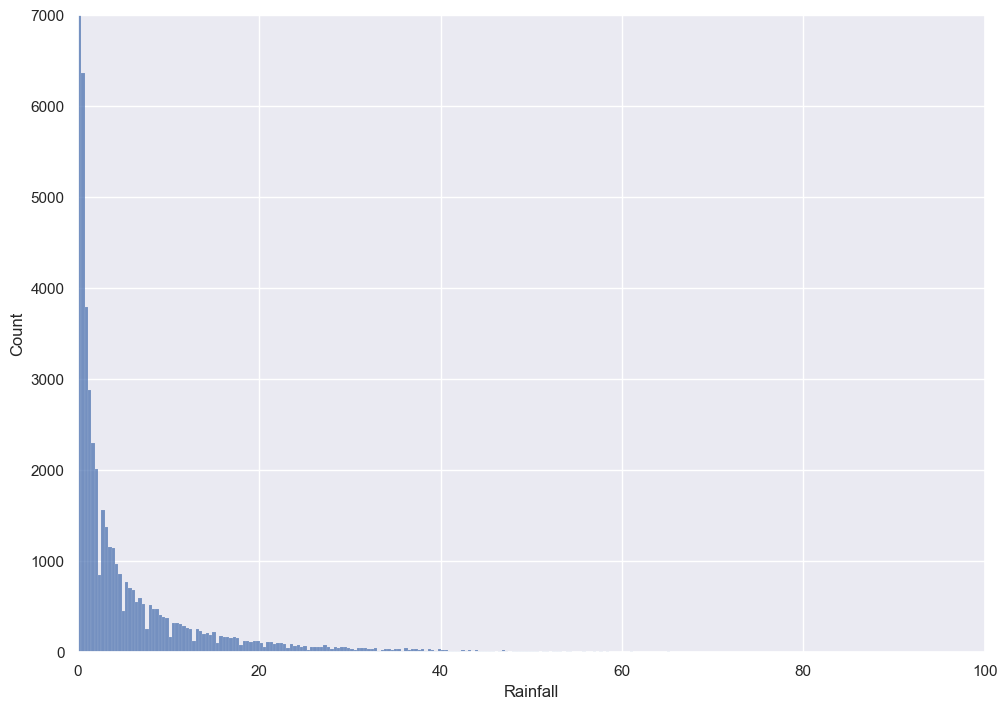

In [20]:
sns.histplot(weather_drop["Rainfall"],bins=1000)
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.ylim(0,7000)
plt.xlim(0,100)

<Axes: xlabel='Rainfall', ylabel='Count'>

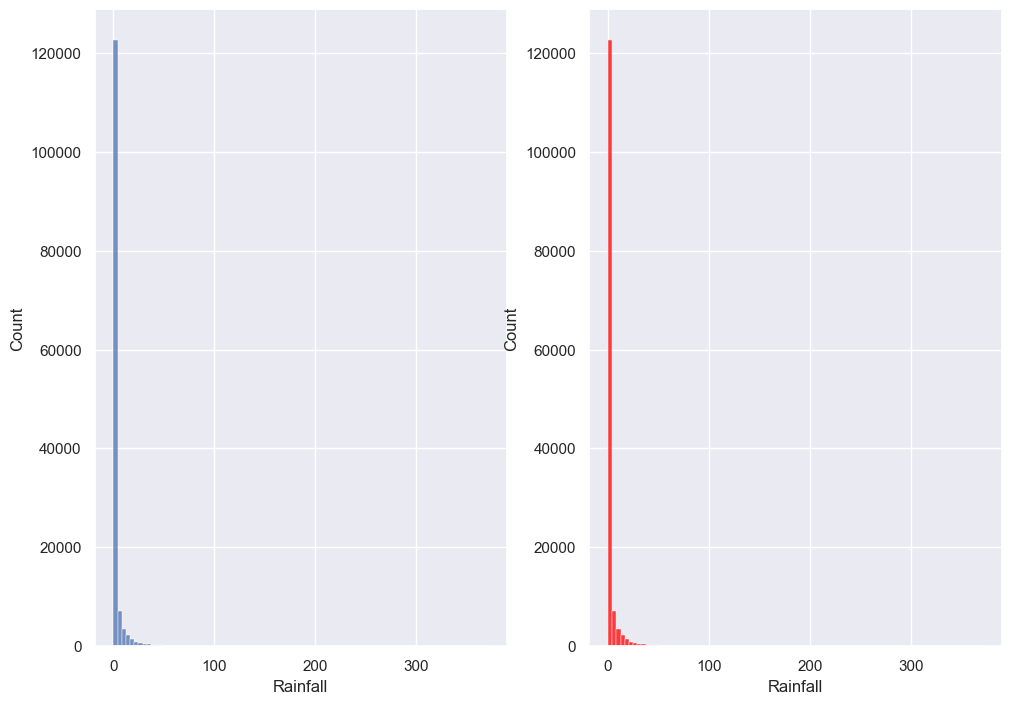

In [21]:
figs,axis=plt.subplots(1,2)
sns.histplot(weather_drop["Rainfall"],bins=90,ax=axis[0])

sns.histplot(weather_impute_knn["Rainfall"],color="red",bins=90,ax=axis[1])



<Axes: xlabel='Rainfall', ylabel='Count'>

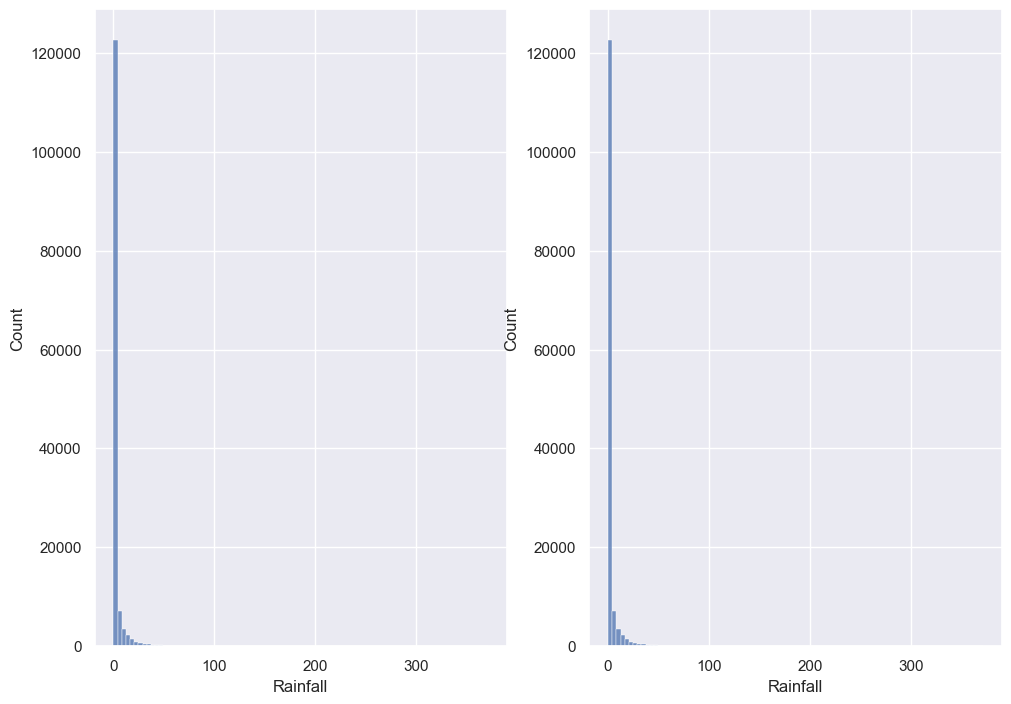

In [22]:
figs,axis=plt.subplots(1,2)
sns.histplot(weather_drop["Rainfall"],bins=90,ax=axis[0])

sns.histplot(weather_impute_iterative["Rainfall"],bins=90,ax=axis[1])


#### we can use many methods and compare it with many imputation methods using this custom function. But today I will go with KNNimputer method.

<Axes: >

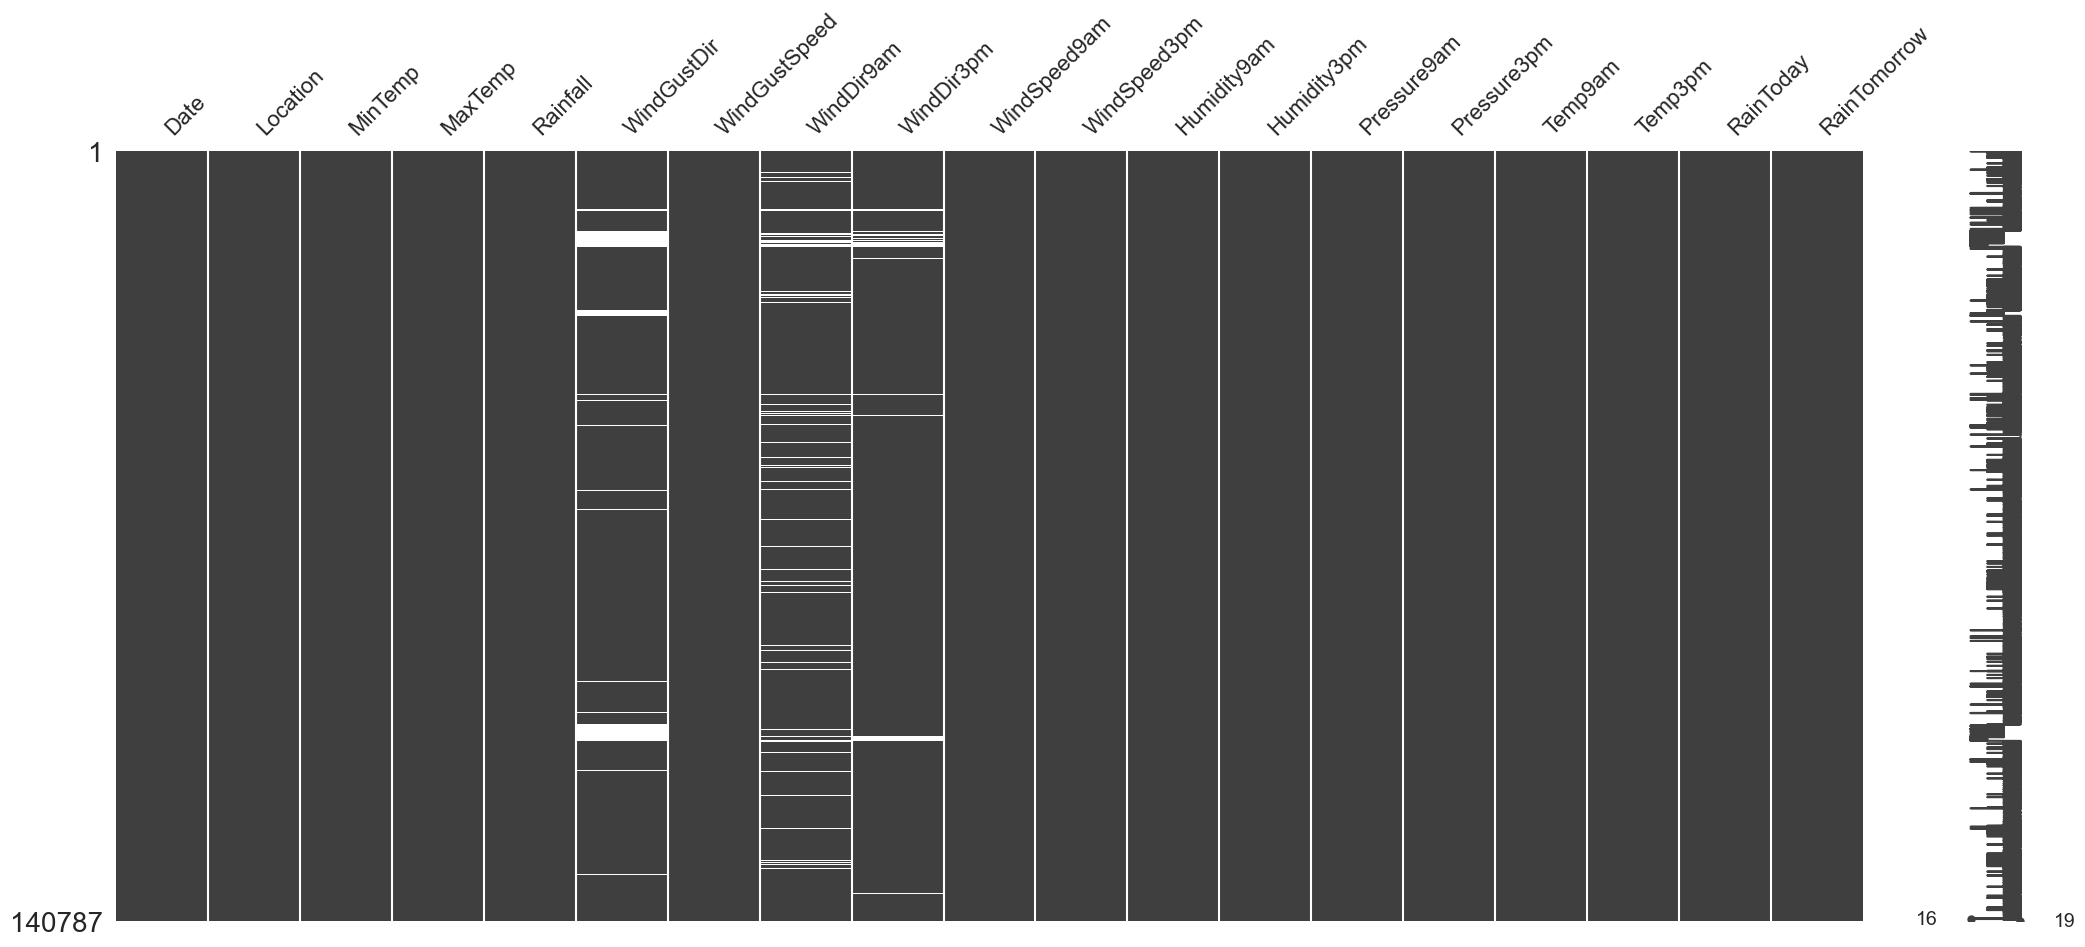

In [23]:
miss.matrix(weather_impute_knn)

We now only have to treat the categorical missing value and impute them and encode them

In [24]:
from feature_engine.imputation import CategoricalImputer

In [25]:
col_cat=list(weather_impute_knn.select_dtypes(object).columns)
col_cat

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [26]:
cat_impute=CategoricalImputer(imputation_method="frequent")
weather_impute=cat_impute.fit_transform(weather_impute_knn)

<Axes: >

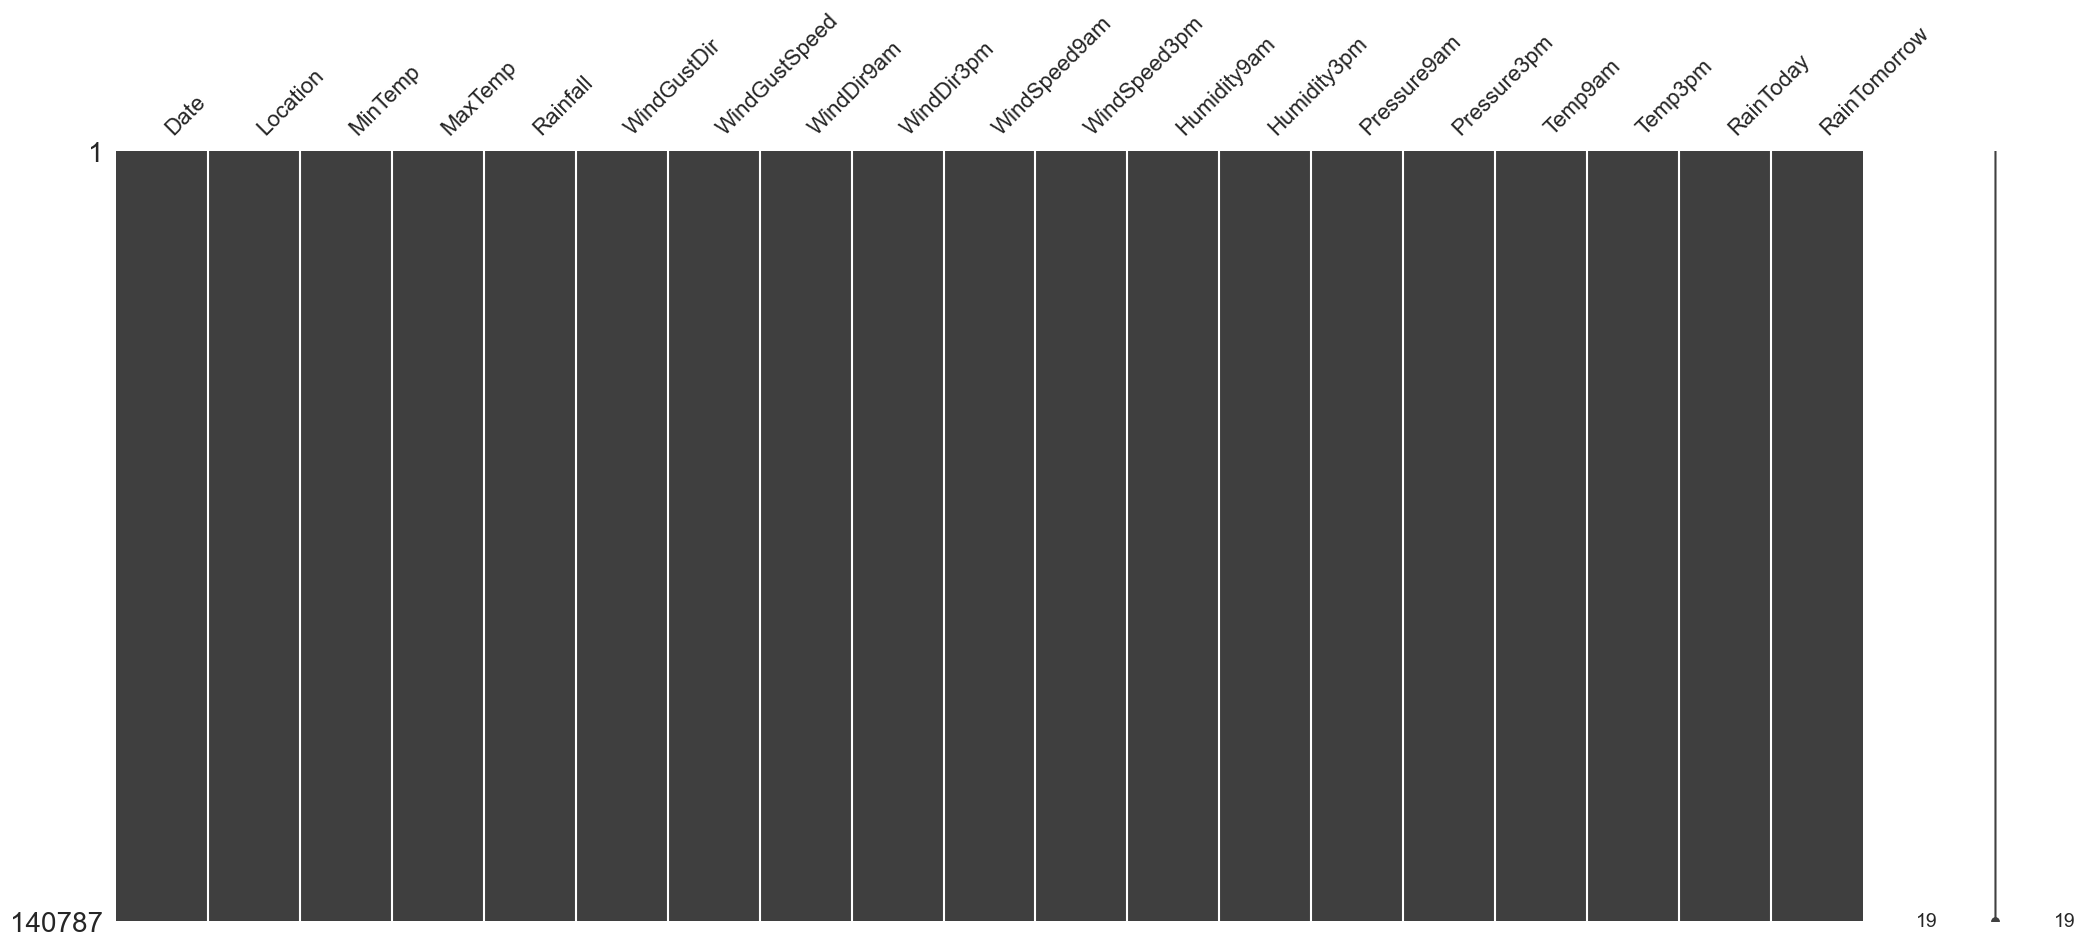

In [27]:
miss.matrix(weather_impute)

In [28]:
def compare(df1,df2):
        for i in list(col_cat): 
            sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
            fig,axis=plt.subplots(nrows=1,ncols=2)
            sns.histplot(df1[i],ax=axis[0])
            axis[0].set_title("before impute")
            sns.histplot(df2[i],color='red',ax=axis[1])
            axis[1].set_title("after impute")
            print(fig)

Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)
Figure(1170x827)


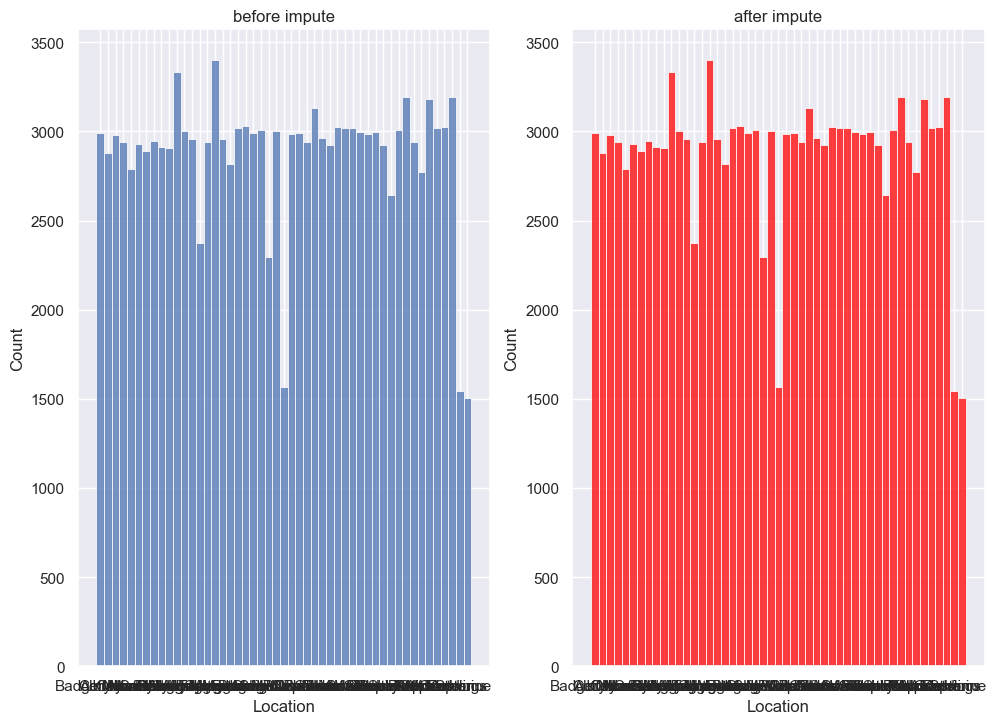

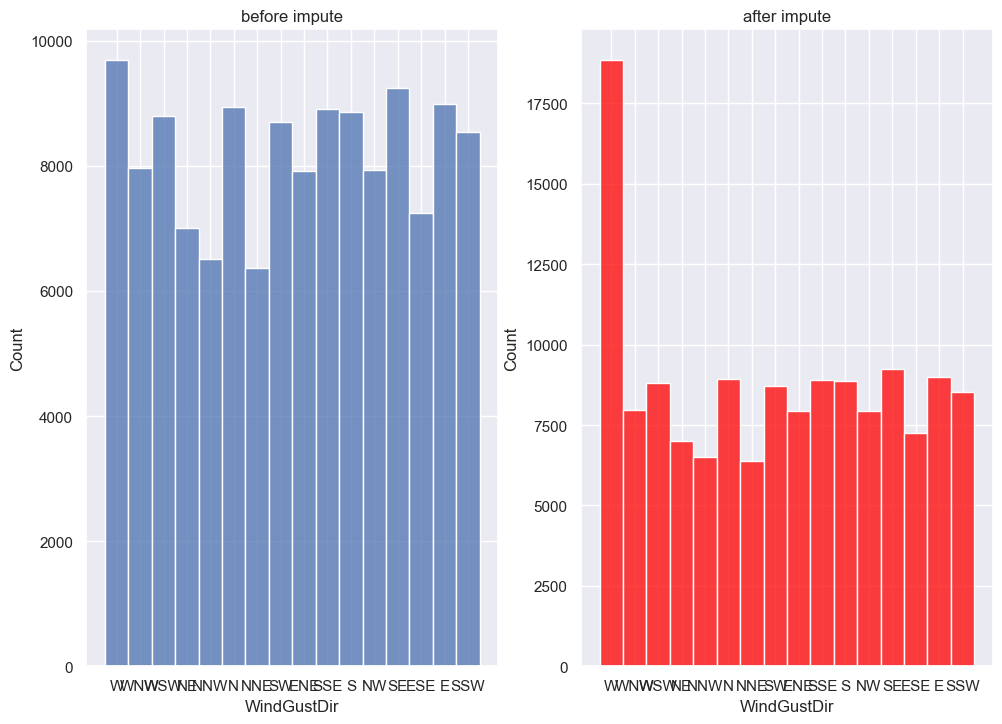

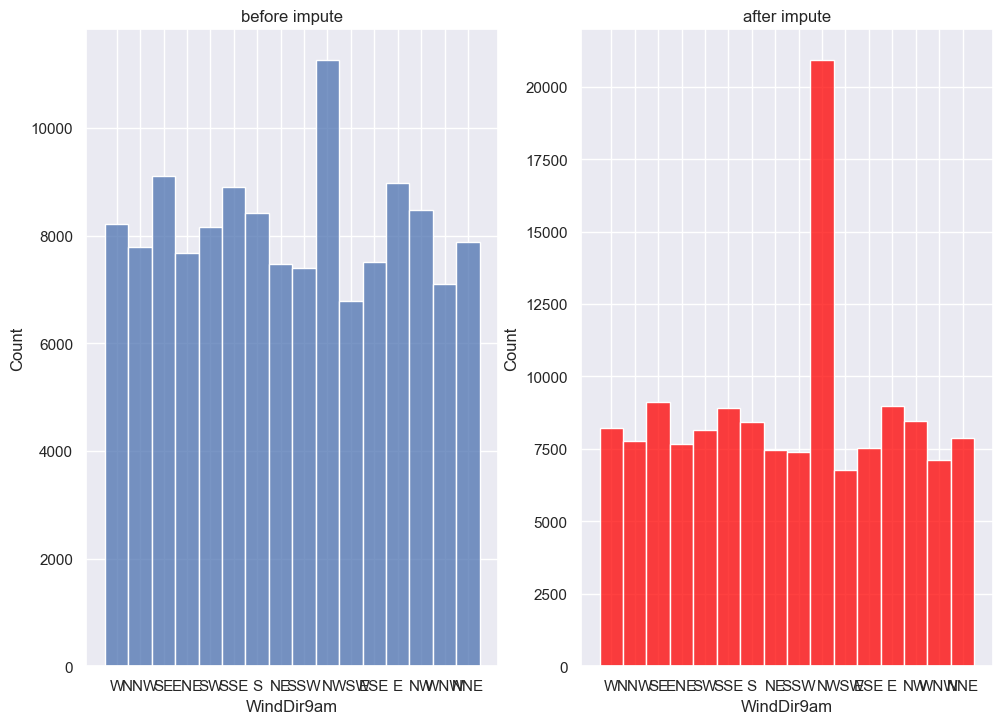

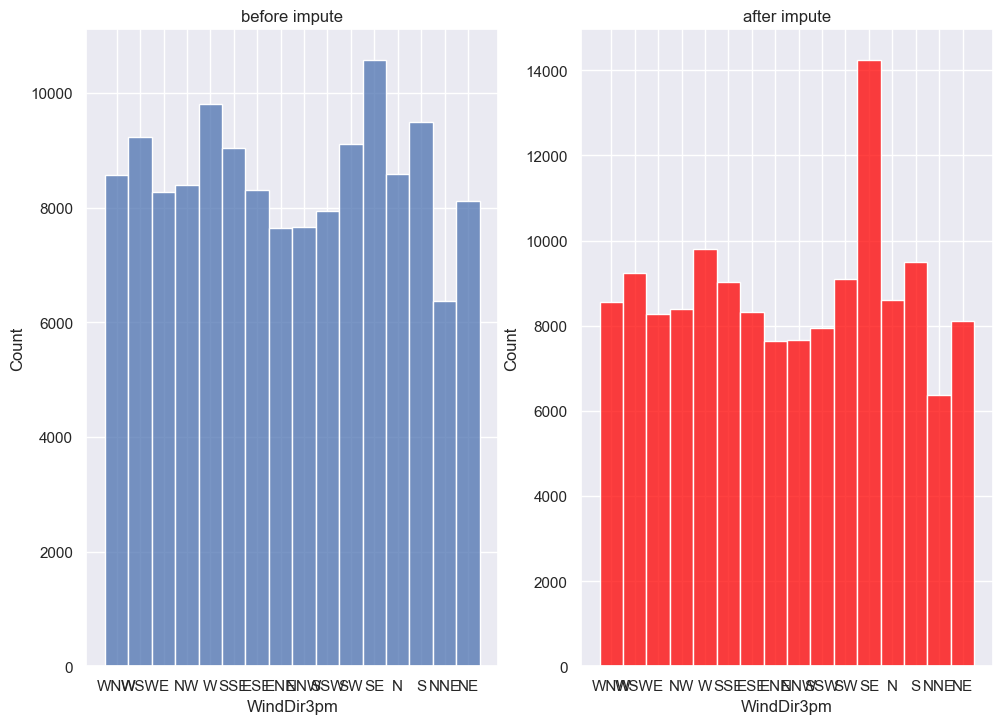

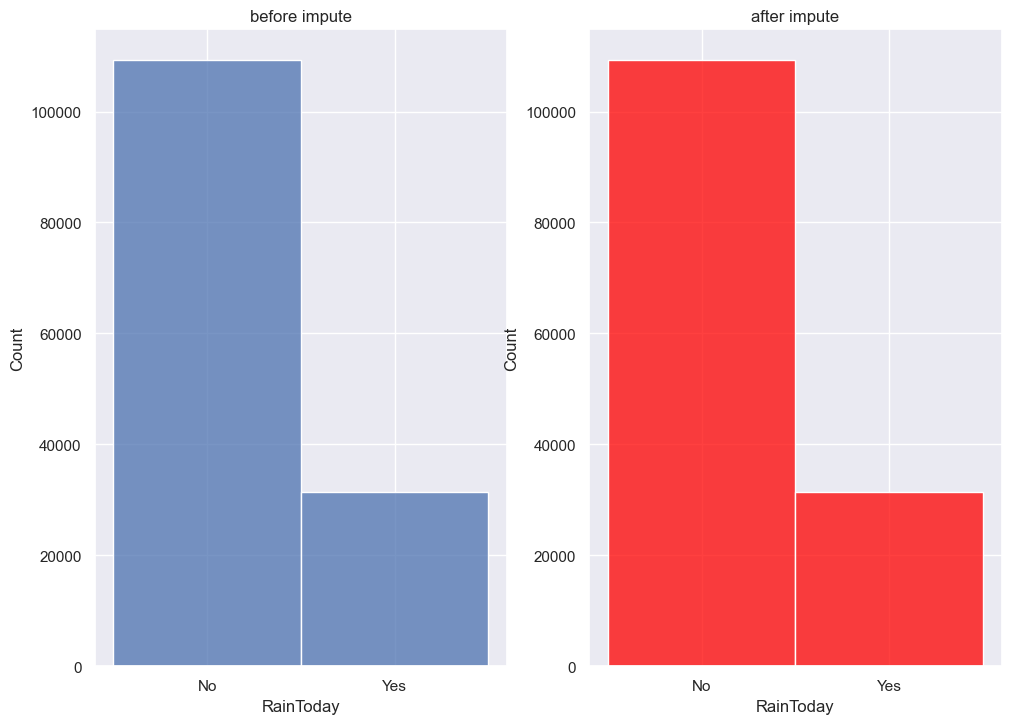

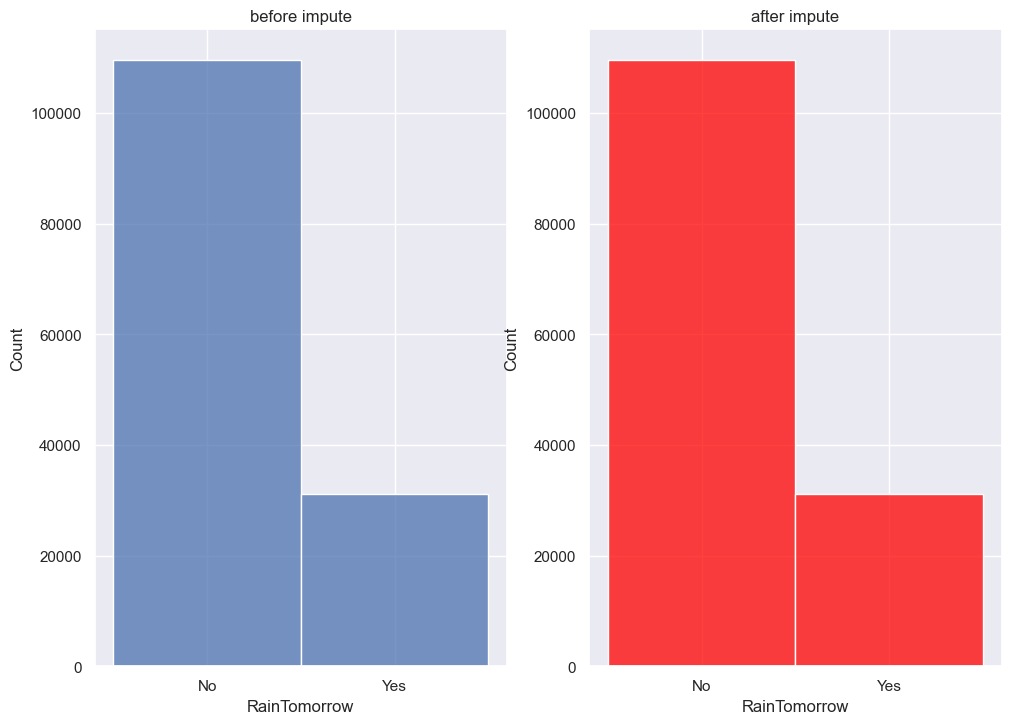

In [29]:
compare(weather_drop,weather_impute)

In [30]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split

In [31]:
scale=SklearnTransformerWrapper(transformer=StandardScaler(),variables=list(col_float))
weather_scale=scale.fit_transform(weather_impute)
encode=SklearnTransformerWrapper(transformer=OrdinalEncoder(),variables=list(col_cat))
weather_encode=encode.fit_transform(weather_scale)

In [32]:
weather_scale

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.190371,-0.046411,-0.206727,W,0.309549,W,WNW,0.674361,0.617140,0.112416,-1.426843,-1.467138,-1.227605,-0.011307,0.012892,No,No
1,2008-12-02,Albury,-0.747612,0.262979,-0.277606,WNW,0.309549,NNW,WSW,-1.125124,0.389699,-1.305769,-1.281982,-1.047308,-1.125876,0.034853,0.374547,No,No
2,2008-12-03,Albury,0.112206,0.347357,-0.277606,WSW,0.459479,W,WSW,0.561893,0.844580,-1.620922,-1.040546,-1.481615,-0.995080,0.619550,0.215419,No,No
3,2008-12-04,Albury,-0.466217,0.670810,-0.277606,NE,-1.189751,SE,E,-0.337849,-1.088666,-1.253244,-1.716566,-0.033923,-0.399235,0.173334,0.692804,No,No
4,2008-12-05,Albury,0.831326,1.275525,-0.159474,W,0.084654,ENE,NW,-0.787720,0.162258,0.690195,-0.895685,-1.018354,-1.387466,0.127174,1.155723,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,-1.357300,-0.201105,-0.277606,E,-0.664996,ESE,E,0.112022,-0.633784,-0.517889,-1.185408,0.993938,0.821521,-1.165313,-0.117304,No,No
145455,2017-06-21,Uluru,-1.466732,0.023905,-0.277606,E,-0.664996,SE,ENE,-0.112914,-0.861225,-0.938092,-1.330269,0.979461,0.690726,-1.057606,0.099689,No,No
145456,2017-06-22,Uluru,-1.341667,0.291105,-0.277606,NNW,-1.339682,SE,N,-0.112914,-1.088666,-0.675465,-1.475130,0.820215,0.516332,-0.934512,0.403480,No,No
145457,2017-06-23,Uluru,-1.060272,0.516115,-0.277606,N,-0.215206,SE,WNW,-0.562785,-1.088666,-0.833041,-1.330269,0.458292,0.182078,-0.688324,0.634939,No,No


In [33]:
weather_encode


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2.0,0.190371,-0.046411,-0.206727,13.0,0.309549,13.0,14.0,0.674361,0.617140,0.112416,-1.426843,-1.467138,-1.227605,-0.011307,0.012892,0.0,0.0
1,2008-12-02,2.0,-0.747612,0.262979,-0.277606,14.0,0.309549,6.0,15.0,-1.125124,0.389699,-1.305769,-1.281982,-1.047308,-1.125876,0.034853,0.374547,0.0,0.0
2,2008-12-03,2.0,0.112206,0.347357,-0.277606,15.0,0.459479,13.0,15.0,0.561893,0.844580,-1.620922,-1.040546,-1.481615,-0.995080,0.619550,0.215419,0.0,0.0
3,2008-12-04,2.0,-0.466217,0.670810,-0.277606,4.0,-1.189751,9.0,0.0,-0.337849,-1.088666,-1.253244,-1.716566,-0.033923,-0.399235,0.173334,0.692804,0.0,0.0
4,2008-12-05,2.0,0.831326,1.275525,-0.159474,13.0,0.084654,1.0,7.0,-0.787720,0.162258,0.690195,-0.895685,-1.018354,-1.387466,0.127174,1.155723,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,41.0,-1.357300,-0.201105,-0.277606,0.0,-0.664996,2.0,0.0,0.112022,-0.633784,-0.517889,-1.185408,0.993938,0.821521,-1.165313,-0.117304,0.0,0.0
145455,2017-06-21,41.0,-1.466732,0.023905,-0.277606,0.0,-0.664996,9.0,1.0,-0.112914,-0.861225,-0.938092,-1.330269,0.979461,0.690726,-1.057606,0.099689,0.0,0.0
145456,2017-06-22,41.0,-1.341667,0.291105,-0.277606,6.0,-1.339682,9.0,3.0,-0.112914,-1.088666,-0.675465,-1.475130,0.820215,0.516332,-0.934512,0.403480,0.0,0.0
145457,2017-06-23,41.0,-1.060272,0.516115,-0.277606,3.0,-0.215206,9.0,14.0,-0.562785,-1.088666,-0.833041,-1.330269,0.458292,0.182078,-0.688324,0.634939,0.0,0.0


### Split The Data With np.split 
As If we shuffle them data leakage will cause

In [34]:
train_set, test_set= np.split(weather_encode, [int(.6 *len(weather_encode))])

C:\Users\Lenovo\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [35]:
train_set.shape,test_set.shape

((84472, 19), (56315, 19))

In [36]:
train_set, val_set= np.split(train_set, [int(.8 *len(train_set))])

In [37]:
train_set.shape,test_set.shape,val_set.shape

((67577, 19), (56315, 19), (16895, 19))

In [38]:
x_train=train_set.drop(["RainTomorrow","Date"],axis=1)
y_train=train_set["RainTomorrow"]

In [39]:
x_test=test_set.drop(["RainTomorrow","Date"],axis=1)
y_test=test_set["RainTomorrow"]

In [40]:
x_val=val_set.drop(["RainTomorrow","Date"],axis=1)
y_val=val_set["RainTomorrow"]

In [41]:
x_train.shape,x_test.shape,x_val.shape

((67577, 17), (56315, 17), (16895, 17))

In [42]:
y_train.shape,y_test.shape,y_val.shape

((67577,), (56315,), (16895,))

### Some Notes >_<

##### 1)sampling_rate = 6—Observations will be sampled at one data point per hour.we will only keep one data point out of 6.
##### 2)sequence_length = 120—Observations will go back 5 days (120 hours).
##### 3)delay = sampling_rate * (sequence_length + 24 - 1)—The target for a sequence will be the  24 hours after the end of the sequence.

In [43]:
sampling_rate = 10
sequence_length =168  #7*24=168
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256
train_dataset=keras.utils.timeseries_dataset_from_array(data=x_train,targets=y_train,sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size)
test_dataset=keras.utils.timeseries_dataset_from_array(data=x_test,targets=y_test,sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size)
val_dataset=keras.utils.timeseries_dataset_from_array(data=x_val,targets=y_val,sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size)

In [44]:
from keras import layers

### Model Building Process

In [60]:
sequence_length = 168 
num_features=17
inputs=keras.Input(shape=(sequence_length,num_features))
x=layers.LSTM(128,recurrent_dropout=0.3,return_sequences=True,unroll=True)(inputs)
residual=x
x=layers.Dropout(0.5)(x)
x=layers.Dense(128,activation="relu")(x)
x=layers.add([x,residual])
x=layers.LSTM(256,recurrent_dropout=0.3,return_sequences=True,unroll=True)(inputs)
residual=x
x=layers.Dropout(0.5)(x)
x=layers.Dense(256,activation="relu")(x)
x=layers.add([x,residual])
x=layers.GlobalAveragePooling1D()(x)
output=layers.Dense(1,activation="sigmoid")(x)

model=keras.Model(inputs,output)

### Normalization Process
Normalization Process Included, The Data Needs To Be Adapted With The Train Data

In [61]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 168, 17)]    0           []                               
                                                                                                  
 lstm_5 (LSTM)                  (None, 168, 256)     280576      ['input_3[0][0]']                
                                                                                                  
 dropout_5 (Dropout)            (None, 168, 256)     0           ['lstm_5[0][0]']                 
                                                                                                  
 dense_7 (Dense)                (None, 168, 256)     65792       ['dropout_5[0][0]']              
                                                                                            

In [53]:
callback=[keras.callbacks.ModelCheckpoint("rnn_best.keras",save_best_only=True)]
model.compile(optimizer="rmsprop",
             loss='BinaryCrossentropy',
             metrics=["accuracy"])
history=model.fit(train_dataset,validation_data=val_dataset,epochs=20,callbacks=callback)

Epoch 1/20
258/258 [==============================] - 190s 549ms/step - loss: 0.5338 - accuracy: 0.7772 - val_loss: 0.5513 - val_accuracy: 0.7528
Epoch 2/20
258/258 [==============================] - 131s 507ms/step - loss: 0.4936 - accuracy: 0.7824 - val_loss: 0.4877 - val_accuracy: 0.7537
Epoch 3/20
258/258 [==============================] - 130s 503ms/step - loss: 0.4062 - accuracy: 0.8240 - val_loss: 0.3822 - val_accuracy: 0.8343
Epoch 4/20
258/258 [==============================] - 128s 494ms/step - loss: 0.3805 - accuracy: 0.8390 - val_loss: 0.3919 - val_accuracy: 0.8303
Epoch 5/20
258/258 [==============================] - 131s 509ms/step - loss: 0.3732 - accuracy: 0.8431 - val_loss: 0.3839 - val_accuracy: 0.8323
Epoch 6/20
258/258 [==============================] - 132s 512ms/step - loss: 0.3677 - accuracy: 0.8443 - val_loss: 0.3958 - val_accuracy: 0.8182
Epoch 7/20
258/258 [==============================] - 131s 507ms/step - loss: 0.3646 - accuracy: 0.8454 - val_loss: 0.3814 -

In [57]:
model= keras.models.load_model("rnn_best.keras")

In [58]:
val_loss,accuracy=model.evaluate(test_dataset)

214/214 [==============================] - 49s 196ms/step - loss: 0.3622 - accuracy: 0.8426


In [59]:
accuracy

0.8425763249397278